# This is for analyzing the enrichment of ISREs that are abolished or created by CommonSNPs

In [1]:
whichDataSet = "CommonSNPs"

In [2]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re2
import seaborn as sns

In [10]:
# Seperate ISRE motifs between ISEs and ISSs
ISE_motifs = pd.read_csv("../data/ISE_ZWpaper_OverrepresentedHexamers.tsv",header=None)
ISS_motifs = pd.read_csv("../data/ISS_ZWpaper_OverrepresentedHexamers.tsv",header=None)

In [8]:
# Reads in ISRE motifs found in introns file
introns_ISREs_singleLocation = pd.read_csv("../processed_data/Introns_Intersect_ISREs_singleISRElocation.txt",header=None,sep="\t")
print introns_ISREs_singleLocation.shape
introns_ISREs_singleLocation.head()

(23964596, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,chr1,925800,925921,NM_152486,+,SAMD11,chr1,925804,925810,GTGTGG,+
1,chr1,925800,925921,NM_152486,+,SAMD11,chr1,925820,925826,GTATTT,+
2,chr1,925800,925921,NM_152486,+,SAMD11,chr1,925805,925811,TGTGGG,+
3,chr1,925800,925921,NM_152486,+,SAMD11,chr1,925842,925848,AGGGGG,+
4,chr1,925800,925921,NM_152486,+,SAMD11,chr1,925839,925845,GGGAGG,+


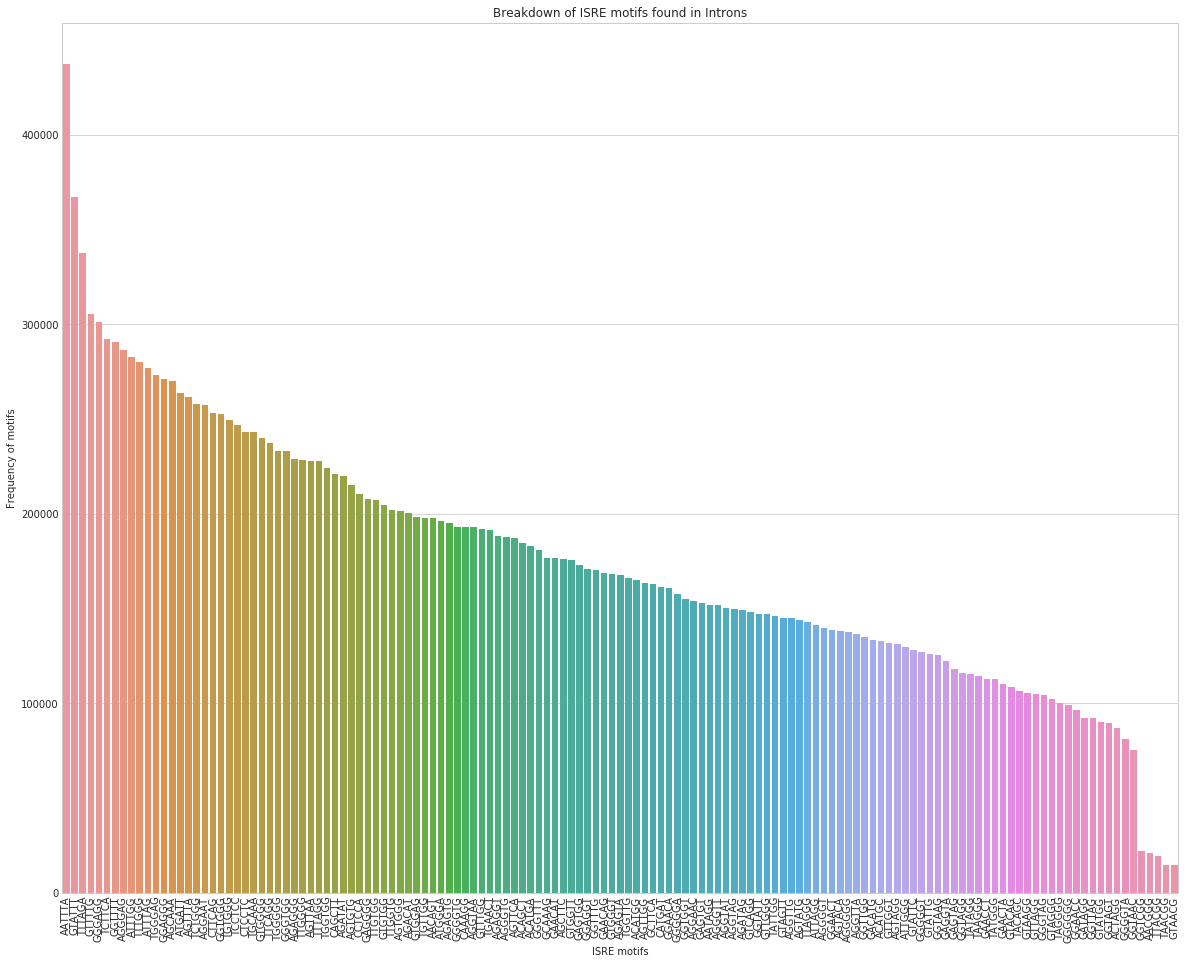

In [9]:
# Look for overrepresented ISREs in introns
ISREs_inIntron_Count = introns_ISREs_singleLocation[9].value_counts()
ISREs_inIntron_Count_df = pd.DataFrame({"Numbers":ISREs_inIntron_Count.values,"ISREmotifs":ISREs_inIntron_Count.index.values},columns=["ISREmotifs","Numbers"])
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_inIntron_Count_df)
plt.xlabel("ISRE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs found in Introns")
plt.show()

In [11]:
# Lets sort the ISRE motif counts by motif
ISREs_inIntron_Count_df_sorted = ISREs_inIntron_Count_df.sort_values(["ISREmotifs"])
print ISREs_inIntron_Count_df_sorted.shape
ISREs_inIntron_Count_df_sorted.head()

(137, 2)


,ISREmotifs,Numbers
45,AACAGT,197871
133,AACGGG,21150
79,AATAGG,152121
0,AATTTA,437252
56,ACAGCT,184786


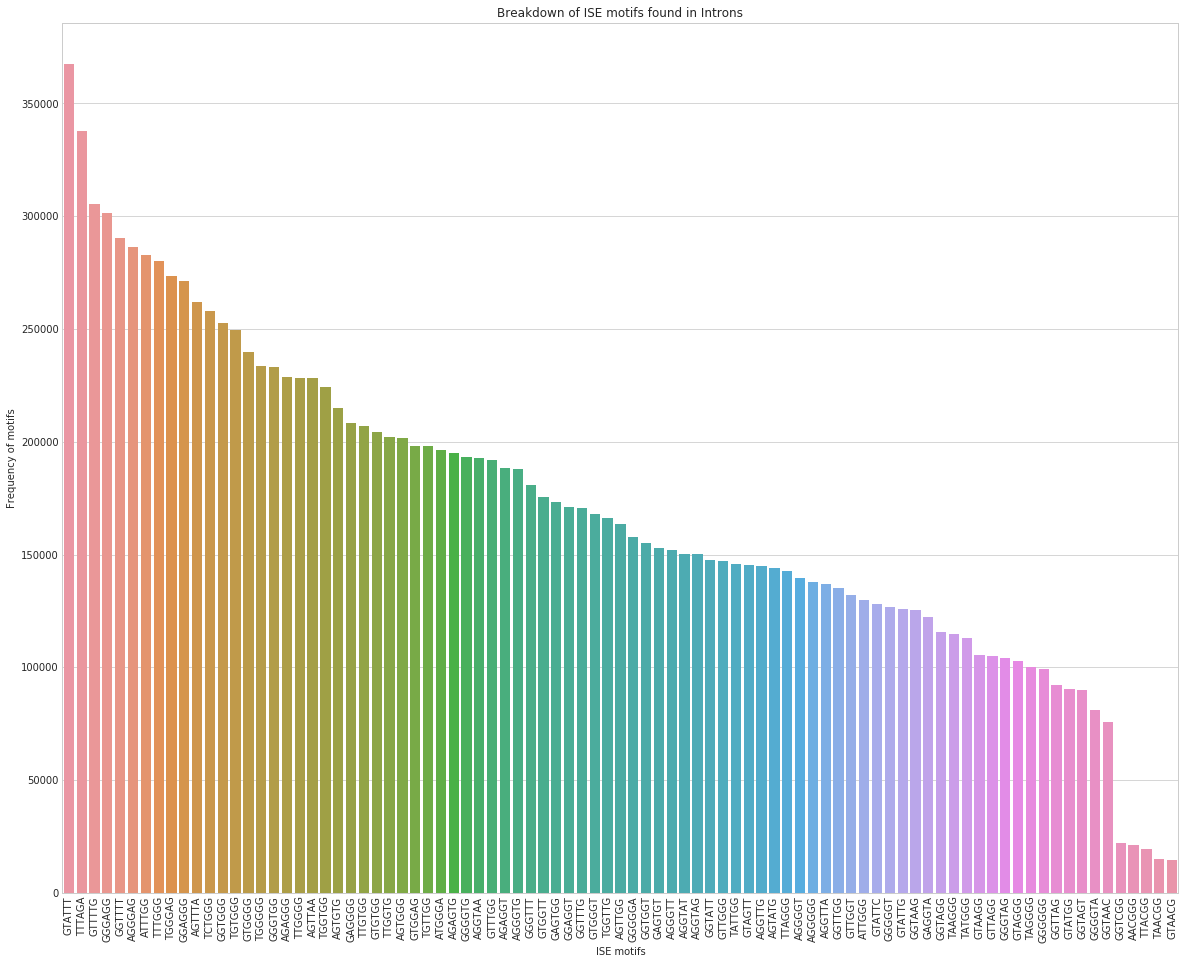

In [12]:
# Let's break this down by ISE and ISSs: First ISE
# Look for overrepresented ISEs in introns
ISREs_inIntron_Count_df_JustISEs = ISREs_inIntron_Count_df[ISREs_inIntron_Count_df["ISREmotifs"].isin(ISE_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_inIntron_Count_df_JustISEs)
plt.xlabel("ISE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs found in Introns")
plt.show()

In [13]:
# Lets sort the ISE motif counts by motif
ISREs_inIntron_Count_df_JustISEs_sorted = ISREs_inIntron_Count_df_JustISEs.sort_values(["ISREmotifs"])
print ISREs_inIntron_Count_df_JustISEs_sorted.shape
ISREs_inIntron_Count_df_JustISEs_sorted["Numbers"] = pd.to_numeric(ISREs_inIntron_Count_df_JustISEs_sorted["Numbers"])
ISREs_inIntron_Count_df_JustISEs_sorted.head()

(87, 2)


,ISREmotifs,Numbers
133,AACGGG,21150
28,AGAGGG,228794
53,AGAGGT,188241
47,AGAGTG,195089
7,AGGGAG,286340


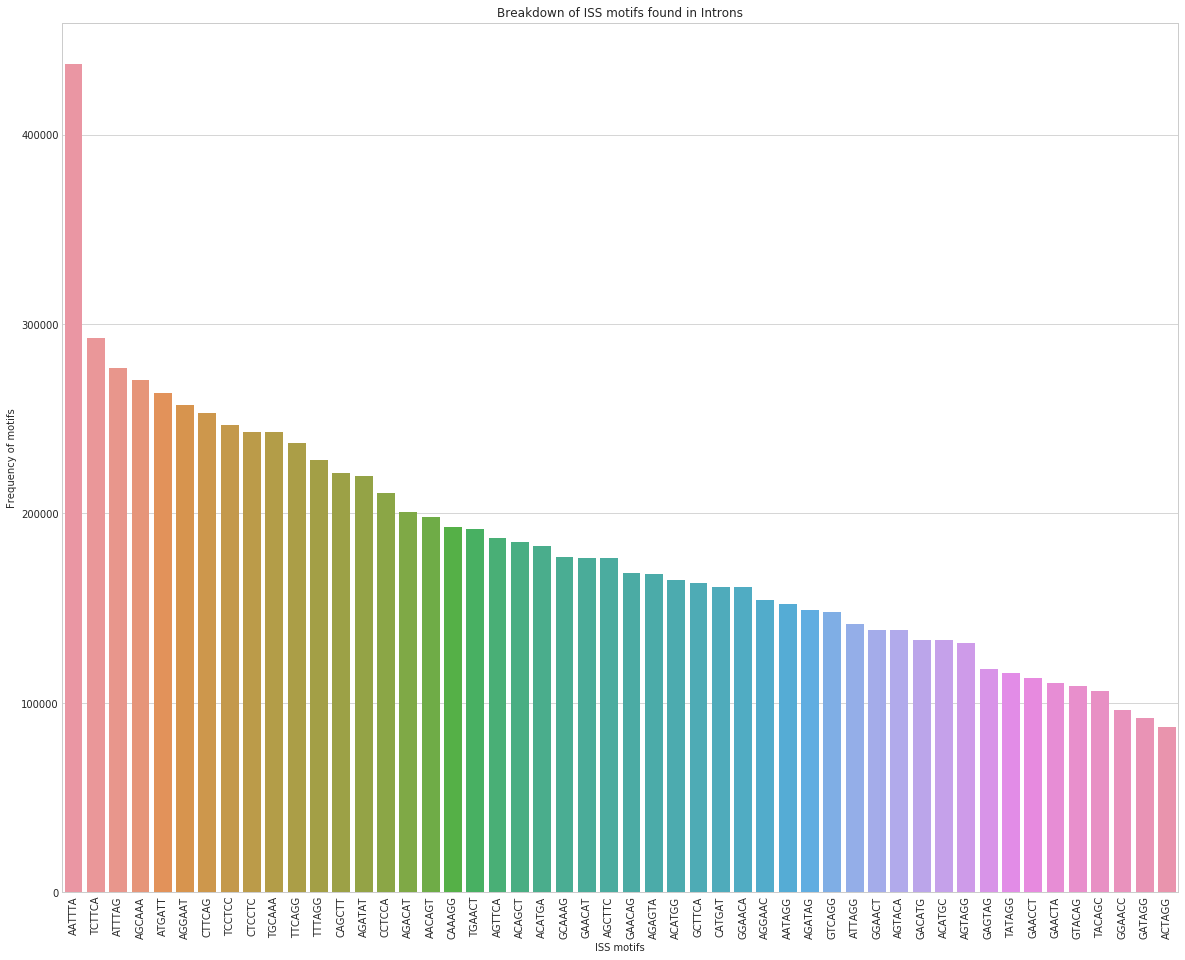

In [14]:
# Look for overrepresented ISSs in introns
ISREs_inIntron_Count_df_JustISSs = ISREs_inIntron_Count_df[ISREs_inIntron_Count_df["ISREmotifs"].isin(ISS_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_inIntron_Count_df_JustISSs)
plt.xlabel("ISS motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs found in Introns")
plt.show()

In [15]:
# Lets sort the ISE motif counts by motif
ISREs_inIntron_Count_df_JustISSs_sorted = ISREs_inIntron_Count_df_JustISSs.sort_values(["ISREmotifs"])
print ISREs_inIntron_Count_df_JustISSs_sorted.shape
ISREs_inIntron_Count_df_JustISSs_sorted.head()

(50, 2)


,ISREmotifs,Numbers
45,AACAGT,197871
79,AATAGG,152121
0,AATTTA,437252
56,ACAGCT,184786
57,ACATGA,182867


In [4]:
# This is a function that will find mutations that will create or destroy ISRE motifs
def getMutationsThatCreateOrDestroyISREMotifs(ISREfile, mutation_seqfile, mutationsOfInterest, mutsite, create):
    # Open the file containing ISRE motifs
    ISRE_motifs = pd.read_csv(ISREfile,header=None)
    print ISRE_motifs.head()
    # Open file with mutations and sequences surrounding mutations
    mutations_withSeq = pd.read_csv(mutation_seqfile,sep="\t",header=None)
    print mutations_withSeq.shape
    # Open file that contains IDs of mutations of interest
    muts_Of_interest = pd.read_csv(mutationsOfInterest,sep="\t",header=None)
    print muts_Of_interest.shape
    
    # Subset muations_withSeq data and only have ones that contains IDs of mutations of interest
    muts_Of_interest_withSeq = mutations_withSeq[mutations_withSeq[9].isin(muts_Of_interest[9])]
    print muts_Of_interest_withSeq.shape
    
    if create == True:
        index_for_seq = 14
    else:
        index_for_seq = 13
    
    # Create a dictionary that stores the mutated sequence as values with mutation id as the key
    muts_dict = pd.Series(muts_Of_interest_withSeq[index_for_seq].values,index=muts_Of_interest_withSeq[9].values).to_dict()
    
    # These are the lists that are going to contain the mutation ids for mutations that result in new ISRE motifs
    mutations_Have_Motifs = []

    # Go through every record in mutation file
    for mut in muts_dict.keys():
        mut_seq = muts_dict[mut]
        mutatedISREmotifs_for_mut = []
        for i in ISRE_motifs[0].values:
            x = [[m.start(), m.end()] for m in re2.finditer(i, mut_seq,overlapped=True) if mutsite in range(m.start(), m.end())]
            if len(x) != 0:
                mutatedISREmotifs_for_mut.append(i)
        if len(mutatedISREmotifs_for_mut) > 0:
            mutations_Have_Motifs.append([mut,mutatedISREmotifs_for_mut])

    return mutations_Have_Motifs

In [5]:
# This is a function that will find mutations that will create or destroy ISRE motifs
def getMutationsThatCreateOrDestroyISREMotifs_Modify(ISREfile, mutation_seqfile, mutationsOfInterest, mutsite, create):
    # Open the file containing ISRE motifs
    ISRE_motifs = pd.read_csv(ISREfile,header=None)
    print ISRE_motifs.head()
    # Open file with mutations and sequences surrounding mutations
    mutations_withSeq = pd.read_csv(mutation_seqfile,sep="\t",header=None)
    print mutations_withSeq.shape
    # Open file that contains IDs of mutations of interest
    muts_Of_interest = pd.read_csv(mutationsOfInterest,sep="\t",header=None)
    print muts_Of_interest.shape
    
    # Subset muations_withSeq data and only have ones that contains IDs of mutations of interest
    muts_Of_interest_withSeq = mutations_withSeq[mutations_withSeq[9].isin(muts_Of_interest[9])]
    print muts_Of_interest_withSeq.shape
    
    if create == True:
        index_for_seq = 14
    else:
        index_for_seq = 13
    
    # We just want to grab the 10 base pair sequence around the mutant since we want to check if
    # WT base or mutant base is within the 6 base pair ISRE
    muts_Seq_JustAroundMut = muts_Of_interest_withSeq[index_for_seq].str.slice(mutsite-5,mutsite+6)
    
    # These are the dictionary that are going to contain the mutation ids for mutations that result in new ISRE motifs
    # as the keys and the values will be the motifs found 
    mutations_Have_Motifs = {}
    
    # Go through every ISRE
    for motif in ISRE_motifs[0].values:
        muts_WithMotif = muts_Of_interest_withSeq[muts_Seq_JustAroundMut.str.contains(motif)][9]
        #print muts_WithMotif.shape
        #print muts_WithMotif.head()
        for mut in muts_WithMotif.values:
            mutations_Have_Motifs[mut] = mutations_Have_Motifs.get(mut,[])+[motif]

    return mutations_Have_Motifs

### Investigate enrichment of ISRE motifs that are created by common SNPs

In [6]:
# Look for ISRE motifs in the sequences around the SNP that contain the minor allele and check if the minor allele
# is within the ISRE motif found
Muts_Create_New_ISREs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ISS_ZWpaper.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,True)
print len(Muts_Create_New_ISREs.keys())

        0
0  ACATGA
1  GTAACG
2  ACATGG
3  GGAACC
4  AGATAG
(2536534, 15)
(2442426, 13)
(2442426, 15)
390231


['GTAGGG', 'TTGTGG', 'GAGTAG', 'AGAGTA', 'TGGTGG', 'TGGGAG', 'GGGAGG', 'GGAGGT', 'GATAGG', 'AACGGG']


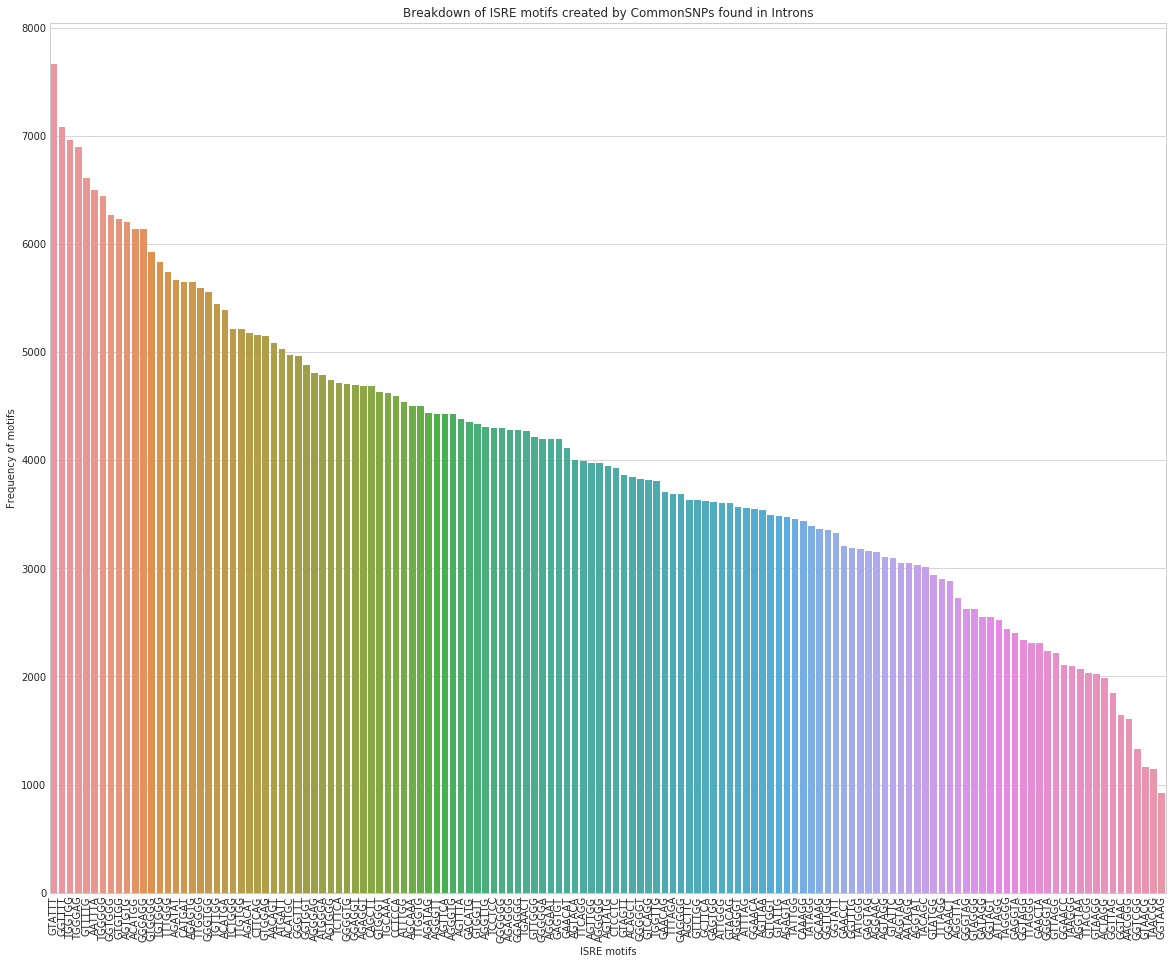

In [43]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_created = []
for val in Muts_Create_New_ISREs.values():
    ISREs_created.extend(val)
print ISREs_created[0:10]
ISREs_created_Count = pd.Series(ISREs_created).value_counts()
ISREs_created_counts_df = pd.DataFrame({"Numbers":ISREs_created_Count.values,"ISREmotifs":ISREs_created_Count.index.values},columns=["ISREmotifs","Numbers"])
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_created_counts_df)
plt.xlabel("ISRE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs created by "+whichDataSet+" found in Introns")
plt.show()

In [44]:
# Look at the top 10 motifs represented
ISREs_created_counts_df.head(n=10)

,ISREmotifs,Numbers
0,GTATTT,7659
1,GGTTTT,7083
2,TGGTGG,6956
3,TGGGAG,6893
4,GTTTTG,6611
5,AATTTA,6501
6,TGGGGG,6447
7,GGTGGG,6267
8,GTGTGG,6226
9,AGTGTG,6203


In [45]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_created_counts_df_sorted = ISREs_created_counts_df.sort_values(["ISREmotifs"])
print ISREs_created_counts_df_sorted.shape
ISREs_created_counts_df_sorted.head()

(137, 2)


,ISREmotifs,Numbers
27,AACAGT,5079
132,AACGGG,1606
105,AATAGG,3050
5,AATTTA,6501
71,ACAGCT,3843


In [46]:
# Add a new column that is the normalized counts
ISREs_created_counts_df_sorted["Normalized_Count"] = (10**8)*ISREs_created_counts_df_sorted["Numbers"]/(sum(ISREs_created_counts_df_sorted["Numbers"])*ISREs_inIntron_Count_df_sorted["Numbers"])
print ISREs_created_counts_df_sorted.shape
ISREs_created_counts_df_sorted.head()

(137, 3)


,ISREmotifs,Numbers,Normalized_Count
27,AACAGT,5079,3.983087
132,AACGGG,1606,13.183558
105,AATAGG,3050,4.397231
5,AATTTA,6501,4.067090
71,ACAGCT,3843,4.303552


In [47]:
# Re-sort by Normalized Count
ISREs_created_counts_df_sorted_ResortByNormalizedCount = ISREs_created_counts_df_sorted.sort_values(["Normalized_Count"],ascending=False)

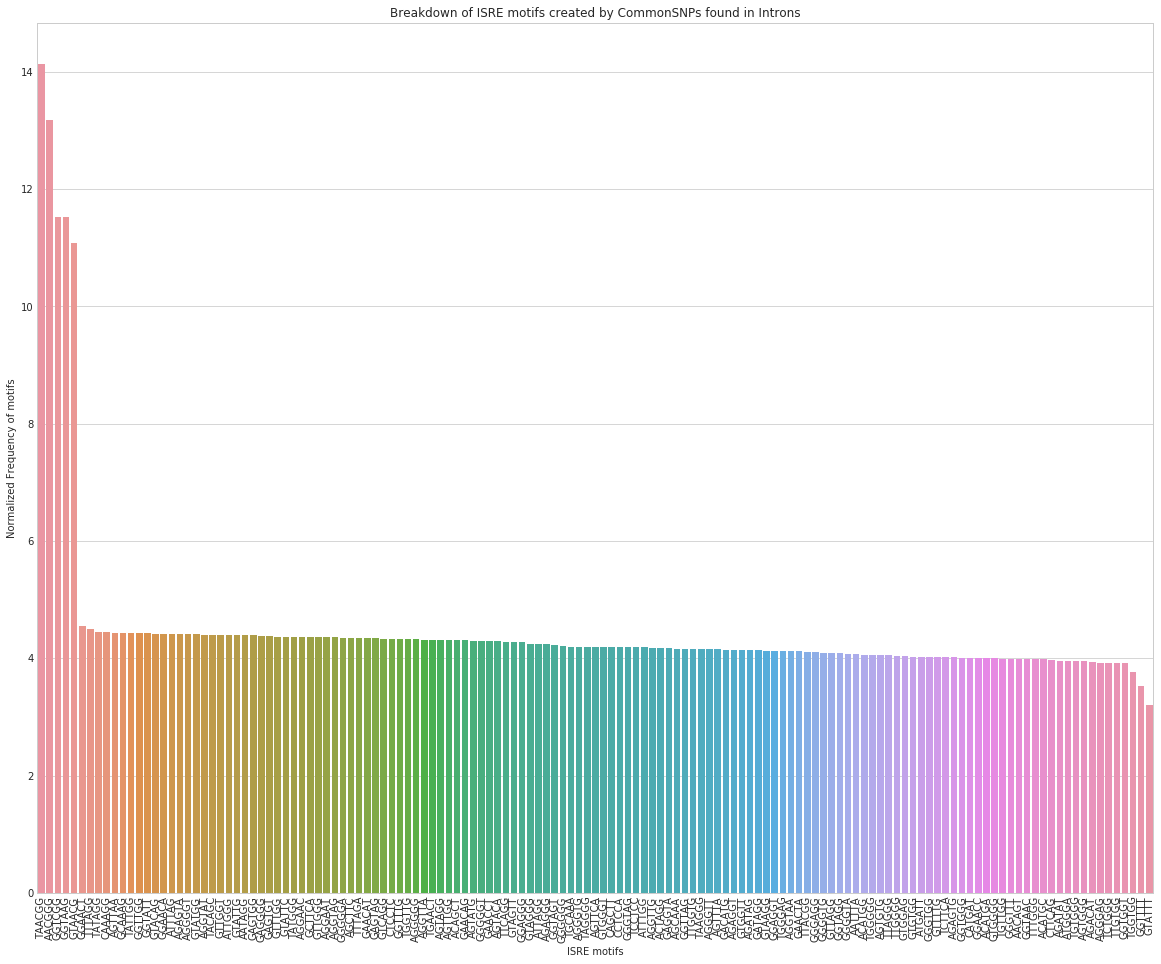

In [48]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_created_counts_df_sorted_ResortByNormalizedCount)
plt.xlabel("ISRE motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs created by "+whichDataSet+" found in Introns")
plt.show()

In [49]:
# Take a look at the top 10
ISREs_created_counts_df_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
135,TAACGG,1146,14.125111
132,AACGGG,1606,13.183558
133,GGTCGG,1332,11.522641
136,GGTAAG,919,11.518876
134,GTAACG,1164,11.087382
110,GGAACT,2883,4.552860
109,TTTAGG,2906,4.504997
93,TATAGG,3396,4.451462
92,CAAAGG,3434,4.439379
87,AGTTAA,3539,4.438356


### Investigate enrichment of ISE motifs that are created by common SNPs

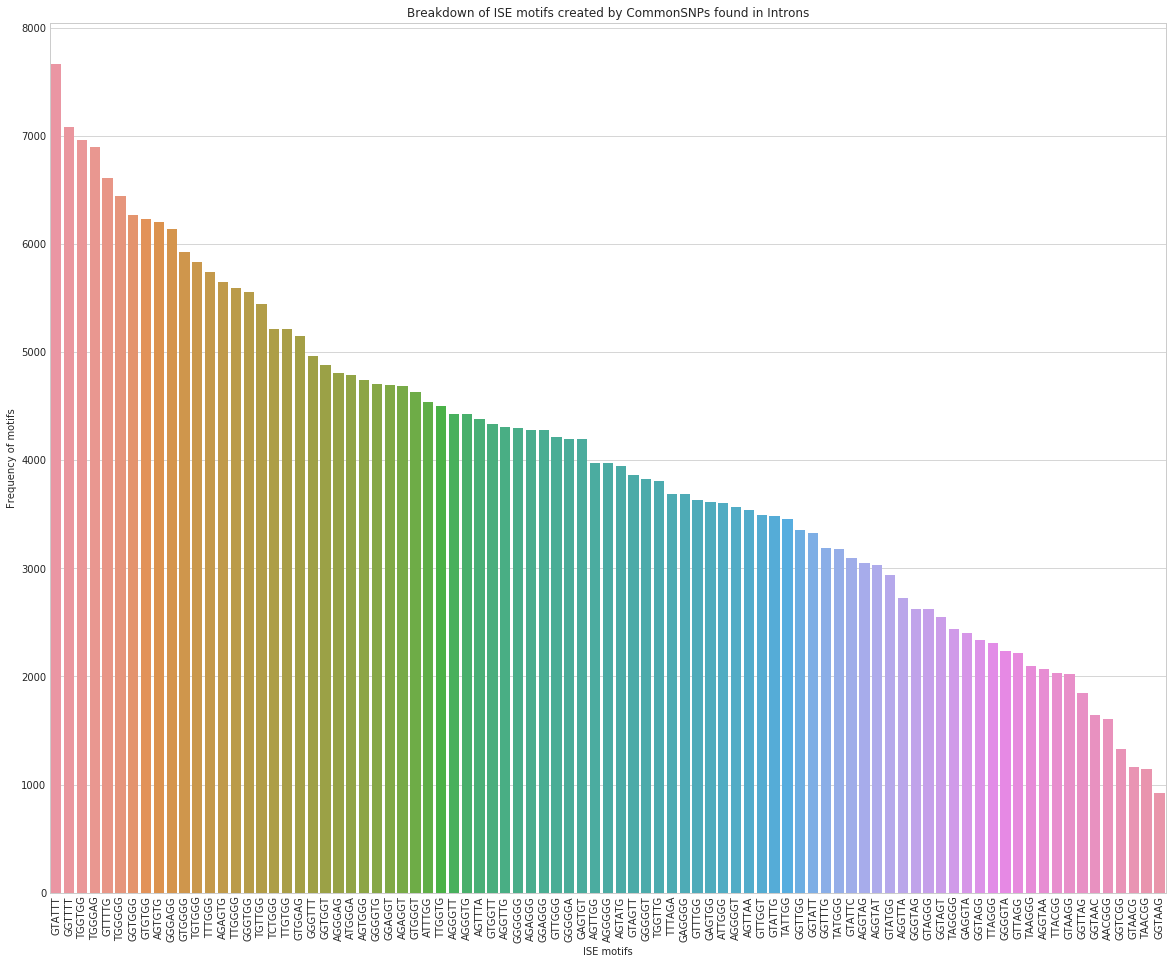

In [50]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_created_Count_df_JustISEs = ISREs_created_counts_df[ISREs_created_counts_df["ISREmotifs"].isin(ISE_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_created_Count_df_JustISEs)
plt.xlabel("ISE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs created by "+whichDataSet+" found in Introns")
plt.show()

In [51]:
# Look at the top 10 motifs represented
ISREs_created_Count_df_JustISEs.head(n=10)

,ISREmotifs,Numbers
0,GTATTT,7659
1,GGTTTT,7083
2,TGGTGG,6956
3,TGGGAG,6893
4,GTTTTG,6611
6,TGGGGG,6447
7,GGTGGG,6267
8,GTGTGG,6226
9,AGTGTG,6203
11,GGGAGG,6139


We need to get normalize the counts to ISE motif counts found in introns

In [52]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_created_Count_df_JustISEs_sorted = ISREs_created_Count_df_JustISEs.sort_values(["ISREmotifs"])
print ISREs_created_Count_df_JustISEs_sorted.shape
ISREs_created_Count_df_JustISEs_sorted["Numbers"] = ISREs_created_Count_df_JustISEs_sorted["Numbers"].astype(float)
ISREs_created_Count_df_JustISEs_sorted.head()

(87, 2)


,ISREmotifs,Numbers
132,AACGGG,1606.0
56,AGAGGG,4280.0
38,AGAGGT,4687.0
17,AGAGTG,5644.0
32,AGGGAG,4808.0


In [53]:
# Add a new column that is the normalized counts
ISREs_created_Count_df_JustISEs_sorted["Normalized_Count"] = (10**8)*ISREs_created_Count_df_JustISEs_sorted["Numbers"].values/(sum(ISREs_created_Count_df_JustISEs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISEs_sorted["Numbers"].values)
print ISREs_created_Count_df_JustISEs_sorted.shape
ISREs_created_Count_df_JustISEs_sorted.head()

(87, 3)


,ISREmotifs,Numbers,Normalized_Count
132,AACGGG,1606.0,21.837881
56,AGAGGG,4280.0,5.379903
38,AGAGGT,4687.0,7.160710
17,AGAGTG,5644.0,8.320119
32,AGGGAG,4808.0,4.829006


In [54]:
# Re-sort by Normalized Count
ISREs_created_Count_df_JustISEs_sorted_ResortByNormalizedCount = ISREs_created_Count_df_JustISEs_sorted.sort_values(["Normalized_Count"],ascending=False)

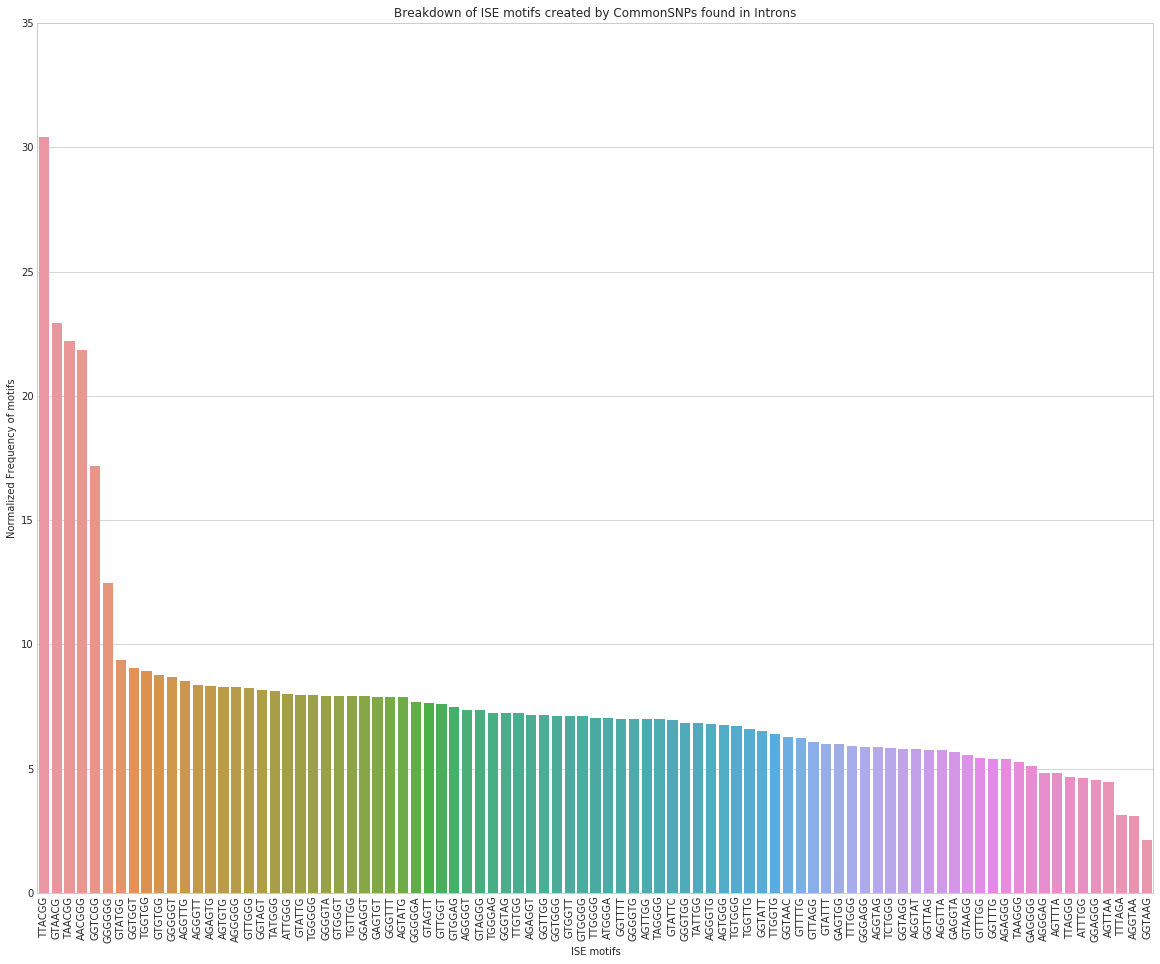

In [58]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_created_Count_df_JustISEs_sorted_ResortByNormalizedCount)
plt.ylim([0,35])
plt.xlabel("ISE motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs created by "+whichDataSet+" found in Introns")
plt.show()

In [56]:
# Take a look at the top 10
ISREs_created_Count_df_JustISEs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
127,TTACGG,2030.0,30.394095
134,GTAACG,1164.0,22.933202
135,TAACGG,1146.0,22.202864
132,AACGGG,1606.0,21.837881
133,GGTCGG,1332.0,17.187331
55,GGGGGG,4298.0,12.449176
108,GTATGG,2943.0,9.362201
31,GGTGGT,4882.0,9.044419
2,TGGTGG,6956.0,8.923120
8,GTGTGG,6226.0,8.754635


In [57]:
# Write the ISEs created by common SNPs into a file
ISREs_created_Count_df_JustISEs_sorted_ResortByNormalizedCount.to_csv("../temp/ISEs_created_CommonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)

### Investigate enrichment of ISS motifs that are created by common SNPs

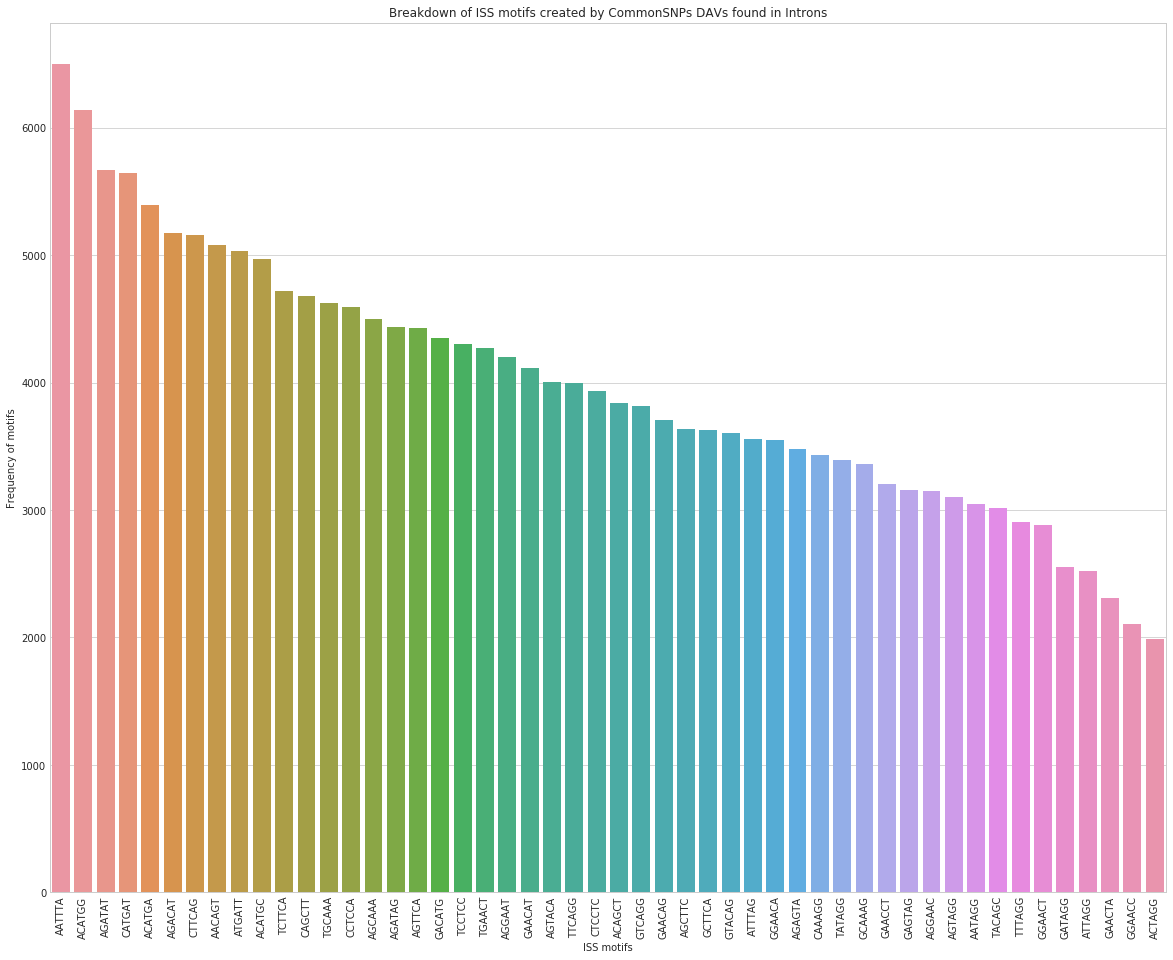

In [59]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_created_Count_df_JustISSs = ISREs_created_counts_df[ISREs_created_counts_df["ISREmotifs"].isin(ISS_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_created_Count_df_JustISSs)
plt.xlabel("ISS motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs created by "+whichDataSet+" DAVs found in Introns")
plt.show()

In [60]:
# Look at the top 10 motifs represented
ISREs_created_Count_df_JustISSs.head(n=10)

,ISREmotifs,Numbers
5,AATTTA,6501
10,ACATGG,6142
15,AGATAT,5667
16,CATGAT,5645
21,ACATGA,5392
24,AGACAT,5172
25,CTTCAG,5158
27,AACAGT,5079
28,ATGATT,5031
29,ACATGC,4968


We need to get normalize the counts to ISS motif counts found in introns

In [61]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_created_Count_df_JustISSs_sorted = ISREs_created_Count_df_JustISSs.sort_values(["ISREmotifs"])
print ISREs_created_Count_df_JustISSs_sorted.shape
ISREs_created_Count_df_JustISSs_sorted["Numbers"] = ISREs_created_Count_df_JustISSs_sorted["Numbers"].astype(float)
ISREs_created_Count_df_JustISSs_sorted.head()

(50, 2)


,ISREmotifs,Numbers
27,AACAGT,5079.0
105,AATAGG,3050.0
5,AATTTA,6501.0
71,ACAGCT,3843.0
21,ACATGA,5392.0


In [62]:
# Add a new column that is the normalized counts
ISREs_created_Count_df_JustISSs_sorted["Normalized_Count"] = (10**8)*ISREs_created_Count_df_JustISSs_sorted["Numbers"].values/(sum(ISREs_created_Count_df_JustISSs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISSs_sorted["Numbers"].values)
print ISREs_created_Count_df_JustISSs_sorted.shape
ISREs_created_Count_df_JustISSs_sorted.head()

(50, 3)


,ISREmotifs,Numbers,Normalized_Count
27,AACAGT,5079.0,12.908407
105,AATAGG,3050.0,10.082942
5,AATTTA,6501.0,7.476958
71,ACAGCT,3843.0,10.458705
21,ACATGA,5392.0,14.828292


In [63]:
# Re-sort by Normalized Count
ISREs_created_Count_df_JustISSs_sorted_ResortByNormalizedCount = ISREs_created_Count_df_JustISSs_sorted.sort_values(["Normalized_Count"],ascending=False)

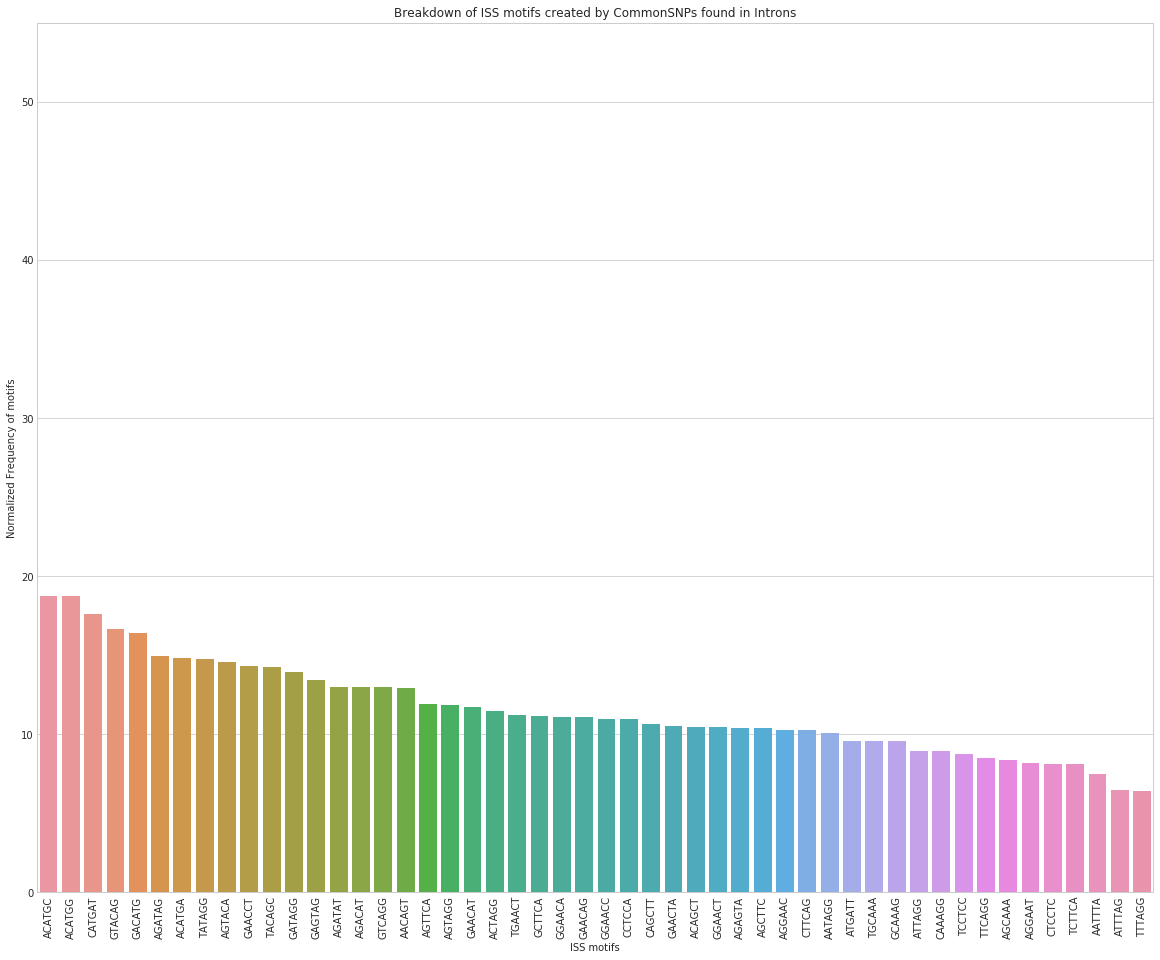

In [64]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_created_Count_df_JustISSs_sorted_ResortByNormalizedCount)
plt.ylim([0,55])
plt.xlabel("ISS motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs created by "+whichDataSet+" found in Introns")
plt.show()

In [65]:
# Take a look at the top 10
ISREs_created_Count_df_JustISSs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
29,ACATGC,4968.0,18.759550
10,ACATGG,6142.0,18.711009
16,CATGAT,5645.0,17.613168
83,GTACAG,3602.0,16.661835
51,GACATG,4349.0,16.400977
46,AGATAG,4437.0,14.965602
21,ACATGA,5392.0,14.828292
93,TATAGG,3396.0,14.776543
64,AGTACA,4002.0,14.536529
97,GAACCT,3208.0,14.284818


In [66]:
# Write the ISSs created by commonSNPs into a file
ISREs_created_Count_df_JustISSs_sorted_ResortByNormalizedCount.to_csv("../temp/ISSs_created_CommonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)

### Investigate enrichment of ISRE motifs that are abolished by common SNPs

In [7]:
# Look for ISRE motifs in the sequences around the mutation that contain the WT base and check if the WT base
# is within the ISRE motif found
Muts_Destroy_ISREs = getMutationsThatCreateOrDestroyISREMotifs_Modify("../data/ISE_ISS_ZWpaper.tsv","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_NotWithinSS-25bp_WTandMUTsequences.txt","../temp/"+whichDataSet+"/Introns_Intersect_"+whichDataSet+"_DoesNotCreateSS.txt",25,False)
print len(Muts_Destroy_ISREs.keys())

        0
0  ACATGA
1  GTAACG
2  ACATGG
3  GGAACC
4  AGATAG
(2536534, 15)
(2442426, 13)
(2442426, 15)
385080


['AACAGT', 'GAACAT', 'ACATGC', 'TTGTGG', 'AGGAAT', 'ACATGC', 'AGGGGT', 'GGGGTG', 'AGTACA', 'TTAGGG']


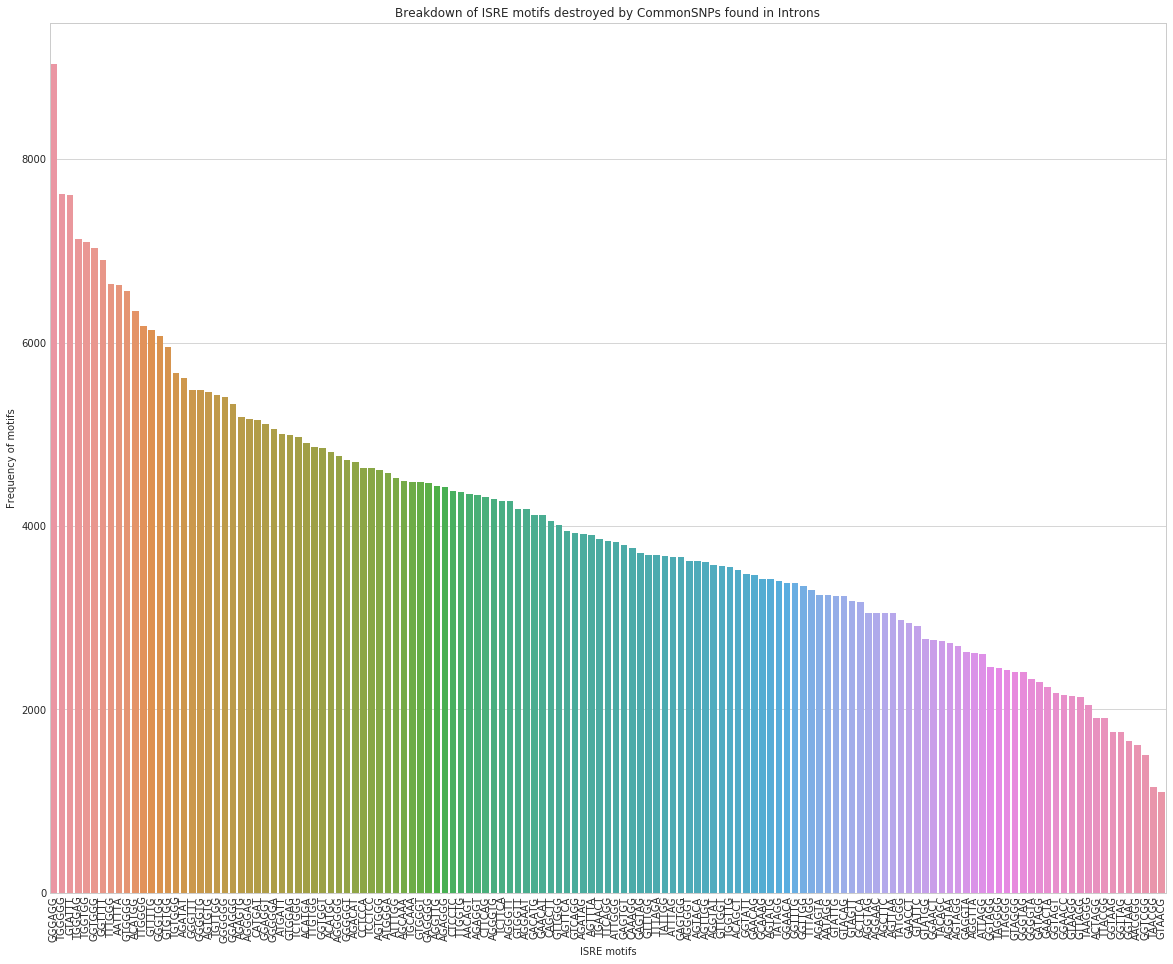

In [16]:
# Look for overrepresented ISREs that are abolished by DAVs
ISREs_destroyed = []
for val in Muts_Destroy_ISREs.values():
    ISREs_destroyed.extend(val)
print ISREs_destroyed[0:10]
ISREs_destroyed_Count = pd.Series(ISREs_destroyed).value_counts()
ISREs_destroyed_counts_df = pd.DataFrame({"Numbers":ISREs_destroyed_Count.values,"ISREmotifs":ISREs_destroyed_Count.index.values},columns=["ISREmotifs","Numbers"])
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_destroyed_counts_df)
plt.xlabel("ISRE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs destroyed by "+whichDataSet+" found in Introns")
plt.show()

In [17]:
# Look at the top 10 motifs represented
ISREs_destroyed_counts_df.head(n=10)

,ISREmotifs,Numbers
0,GGGAGG,9032
1,TGGGGG,7621
2,GTATTT,7610
3,TGGGAG,7134
4,TGGTGG,7094
5,GGTGGG,7032
6,GGTTTT,6905
7,TTTGGG,6639
8,AATTTA,6622
9,GTGGGG,6562


We need to get normalize the counts to ISRE motif counts found in introns

In [18]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_destroyed_counts_df_sorted = ISREs_destroyed_counts_df.sort_values(["ISREmotifs"])
print ISREs_destroyed_counts_df_sorted.shape
ISREs_destroyed_counts_df_sorted.head()

(137, 2)


,ISREmotifs,Numbers
51,AACAGT,4343
133,AACGGG,1607
95,AATAGG,3242
8,AATTTA,6622
84,ACAGCT,3522


In [19]:
# Add a new column that is the normalized counts
ISREs_destroyed_counts_df_sorted["Normalized_Count"] = (10**8)*ISREs_destroyed_counts_df_sorted["Numbers"]/(sum(ISREs_destroyed_counts_df_sorted["Numbers"])*ISREs_inIntron_Count_df_sorted["Numbers"])
print ISREs_destroyed_counts_df_sorted.shape
ISREs_destroyed_counts_df_sorted.head()

(137, 3)


,ISREmotifs,Numbers,Normalized_Count
51,AACAGT,4343,4.124515
133,AACGGG,1607,13.853457
95,AATAGG,3242,4.269458
8,AATTTA,6622,4.267772
84,ACAGCT,3522,4.335479


In [20]:
# Re-sort by Normalized Count
ISREs_destroyed_counts_df_sorted_ResortByNormalizedCount = ISREs_destroyed_counts_df_sorted.sort_values(["Normalized_Count"],ascending=False)

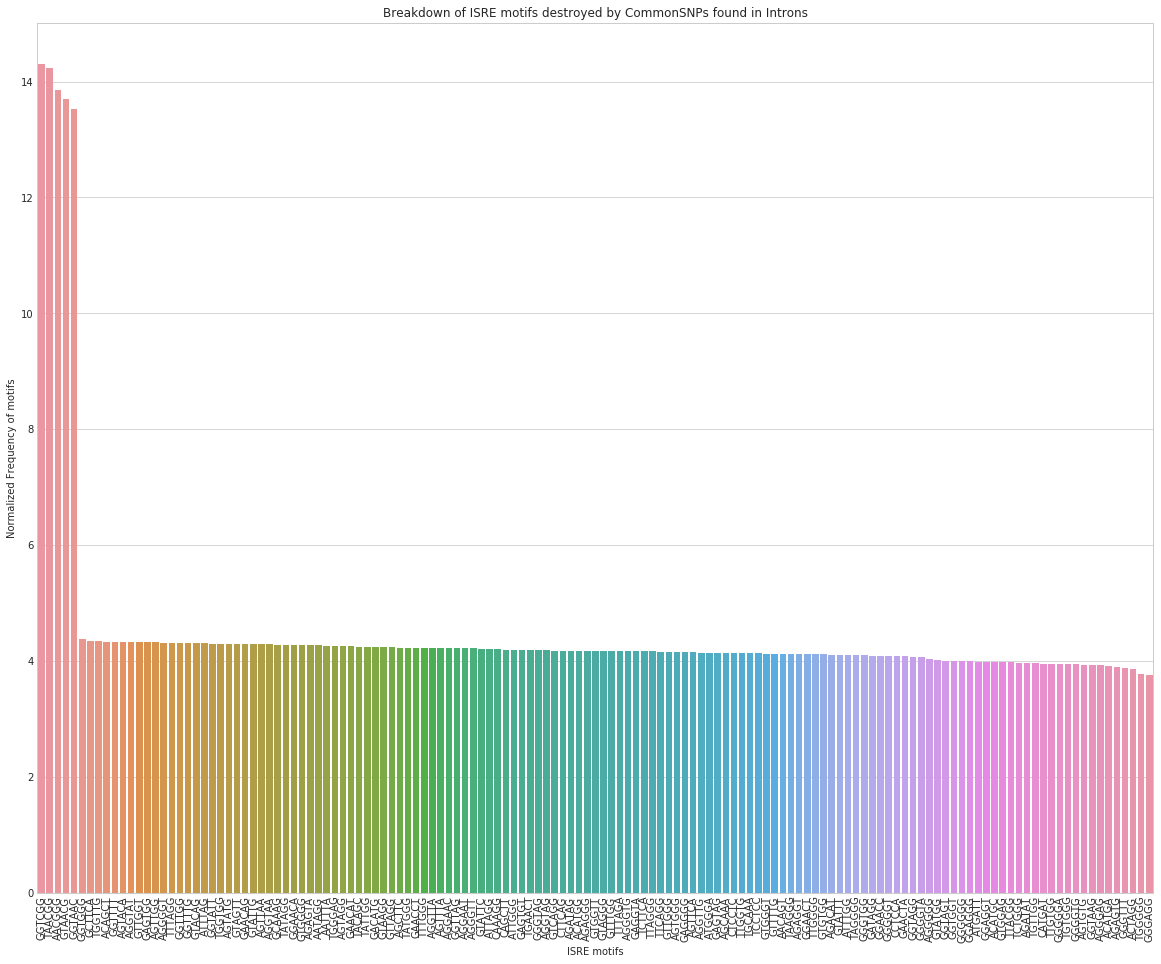

In [21]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_destroyed_counts_df_sorted_ResortByNormalizedCount)
plt.xlabel("ISRE motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs destroyed by "+whichDataSet+" found in Introns")
plt.show()

In [22]:
# Take a look at the top 10
ISREs_destroyed_counts_df_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
134,GGTCGG,1506,14.295373
135,TAACGG,1159,14.235907
133,AACGGG,1607,13.853457
136,GTAACG,1097,13.702370
132,GGTAAC,1654,13.530600
5,GGTGGG,7032,4.384064
99,GCTTCA,3176,4.342471
83,TGGTTG,3547,4.337525
84,ACAGCT,3522,4.335479
6,GGTTTT,6905,4.333053


### Investigate enrichment of ISE motifs that are destroyed by common SNPs

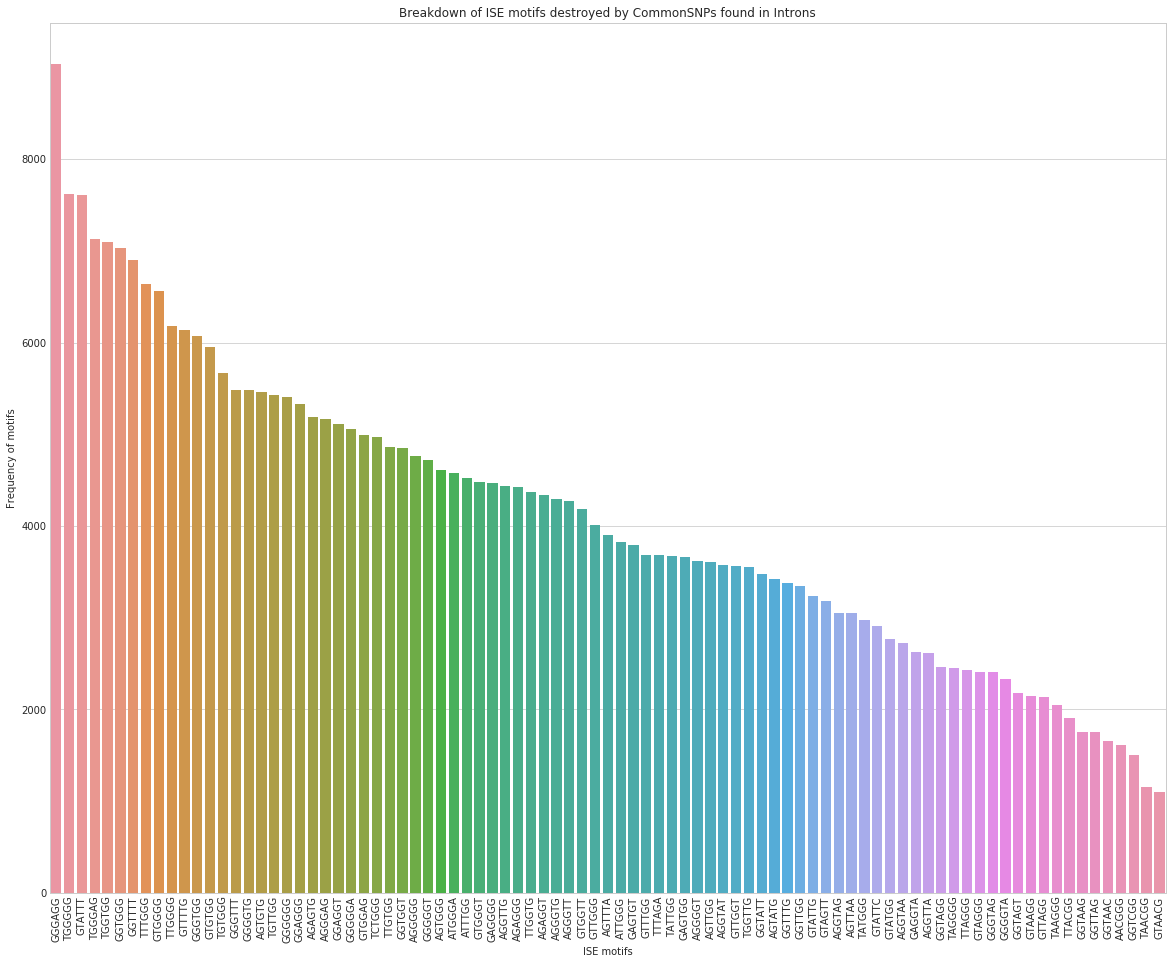

In [23]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_destroyed_Count_df_JustISEs = ISREs_destroyed_counts_df[ISREs_destroyed_counts_df["ISREmotifs"].isin(ISE_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_destroyed_Count_df_JustISEs)
plt.xlabel("ISE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs destroyed by "+whichDataSet+" found in Introns")
plt.show()

In [24]:
# Look at the top 10 motifs represented
ISREs_destroyed_Count_df_JustISEs.head(n=10)

,ISREmotifs,Numbers
0,GGGAGG,9032
1,TGGGGG,7621
2,GTATTT,7610
3,TGGGAG,7134
4,TGGTGG,7094
5,GGTGGG,7032
6,GGTTTT,6905
7,TTTGGG,6639
9,GTGGGG,6562
11,TTGGGG,6177


We need to get normalize the counts to ISE motif counts found in introns

In [25]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_destroyed_Count_df_JustISEs_sorted = ISREs_destroyed_Count_df_JustISEs.sort_values(["ISREmotifs"])
print ISREs_destroyed_Count_df_JustISEs_sorted.shape
ISREs_destroyed_Count_df_JustISEs_sorted["Numbers"] = ISREs_destroyed_Count_df_JustISEs_sorted["Numbers"].astype(float)
ISREs_destroyed_Count_df_JustISEs_sorted.head()

(87, 2)


,ISREmotifs,Numbers
133,AACGGG,1607.0
48,AGAGGG,4427.0
52,AGAGGT,4334.0
23,AGAGTG,5192.0
24,AGGGAG,5171.0


In [26]:
# Add a new column that is the normalized counts
ISREs_destroyed_Count_df_JustISEs_sorted["Normalized_Count"] = (10**8)*ISREs_destroyed_Count_df_JustISEs_sorted["Numbers"].values/(sum(ISREs_destroyed_Count_df_JustISEs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISEs_sorted["Numbers"].values)
print ISREs_destroyed_Count_df_JustISEs_sorted.shape
ISREs_destroyed_Count_df_JustISEs_sorted.head()

(87, 3)


,ISREmotifs,Numbers,Normalized_Count
133,AACGGG,1607.0,21.271420
48,AGAGGG,4427.0,5.416963
52,AGAGGT,4334.0,6.445634
23,AGAGTG,5192.0,7.450628
24,AGGGAG,5171.0,5.055726


In [27]:
# Re-sort by Normalized Count
ISREs_destroyed_Count_df_JustISEs_sorted_ResortByNormalizedCount = ISREs_destroyed_Count_df_JustISEs_sorted.sort_values(["Normalized_Count"],ascending=False)

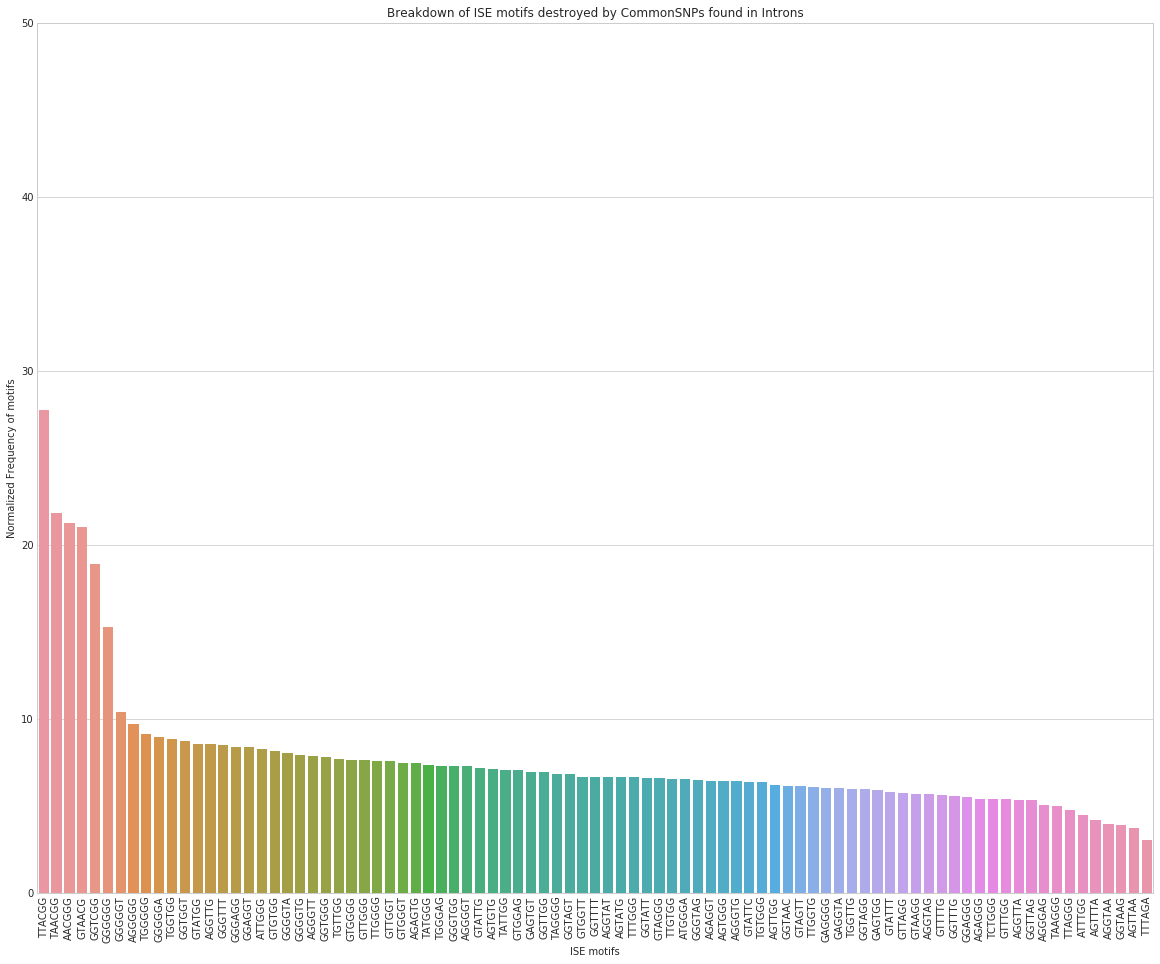

In [30]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_destroyed_Count_df_JustISEs_sorted_ResortByNormalizedCount)
plt.xlabel("ISE motifs")
plt.ylabel("Normalized Frequency of motifs")
plt.ylim([0,50])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs destroyed by "+whichDataSet+" found in Introns")
plt.show()

In [29]:
# Take a look at the top 10
ISREs_destroyed_Count_df_JustISEs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
129,TTACGG,1903.0,27.736242
135,TAACGG,1159.0,21.858657
133,AACGGG,1607.0,21.271420
136,GTAACG,1097.0,21.039432
134,GGTCGG,1506.0,18.916677
21,GGGGGG,5410.0,15.254118
36,GGGGGT,4723.0,10.419100
35,AGGGGG,4761.0,9.684263
1,TGGGGG,7621.0,9.140002
27,GGGGGA,5055.0,8.975079


In [33]:
# Write the ISEs destroyed by Common SNPs into a file
ISREs_destroyed_Count_df_JustISEs_sorted_ResortByNormalizedCount.to_csv("../temp/ISEs_destroyed_commonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)

### Investigate enrichment of ISS motifs that are destroyed by common SNPs

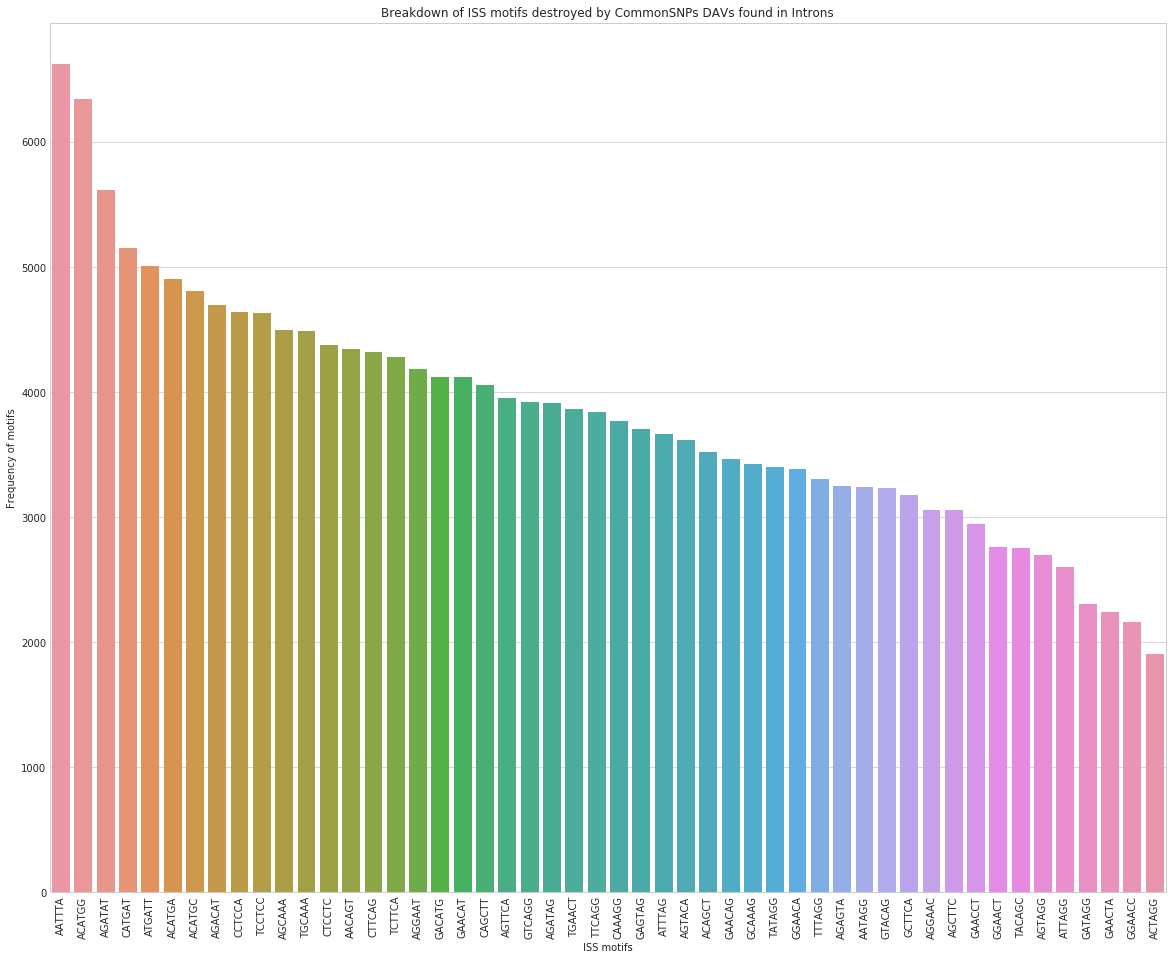

In [34]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_destroyed_Count_df_JustISSs = ISREs_destroyed_counts_df[ISREs_destroyed_counts_df["ISREmotifs"].isin(ISS_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_destroyed_Count_df_JustISSs)
plt.xlabel("ISS motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs destroyed by "+whichDataSet+" DAVs found in Introns")
plt.show()

In [35]:
# Look at the top 10 motifs represented
ISREs_destroyed_Count_df_JustISSs.head(n=10)

,ISREmotifs,Numbers
8,AATTTA,6622
10,ACATGG,6341
16,AGATAT,5616
25,CATGAT,5150
28,ATGATT,5008
31,ACATGA,4904
34,ACATGC,4808
37,AGACAT,4692
38,CCTCCA,4637
39,TCCTCC,4633


We need to get normalize the counts to ISS motif counts found in introns

In [36]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_destroyed_Count_df_JustISSs_sorted = ISREs_destroyed_Count_df_JustISSs.sort_values(["ISREmotifs"])
print ISREs_destroyed_Count_df_JustISSs_sorted.shape
ISREs_destroyed_Count_df_JustISSs_sorted["Numbers"] = ISREs_destroyed_Count_df_JustISSs_sorted["Numbers"].astype(float)
ISREs_destroyed_Count_df_JustISSs_sorted.head()

(50, 2)


,ISREmotifs,Numbers
51,AACAGT,4343.0
95,AATAGG,3242.0
8,AATTTA,6622.0
84,ACAGCT,3522.0
31,ACATGA,4904.0


In [37]:
# Add a new column that is the normalized counts
ISREs_destroyed_Count_df_JustISSs_sorted["Normalized_Count"] = (10**8)*ISREs_destroyed_Count_df_JustISSs_sorted["Numbers"].values/(sum(ISREs_destroyed_Count_df_JustISSs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISSs_sorted["Numbers"].values)
print ISREs_destroyed_Count_df_JustISSs_sorted.shape
ISREs_destroyed_Count_df_JustISSs_sorted.head()

(50, 3)


,ISREmotifs,Numbers,Normalized_Count
51,AACAGT,4343.0,11.475515
95,AATAGG,3242.0,11.142646
8,AATTTA,6622.0,7.918116
84,ACAGCT,3522.0,9.965172
31,ACATGA,4904.0,14.021020


In [38]:
# Re-sort by Normalized Count
ISREs_destroyed_Count_df_JustISSs_sorted_ResortByNormalizedCount = ISREs_destroyed_Count_df_JustISSs_sorted.sort_values(["Normalized_Count"],ascending=False)

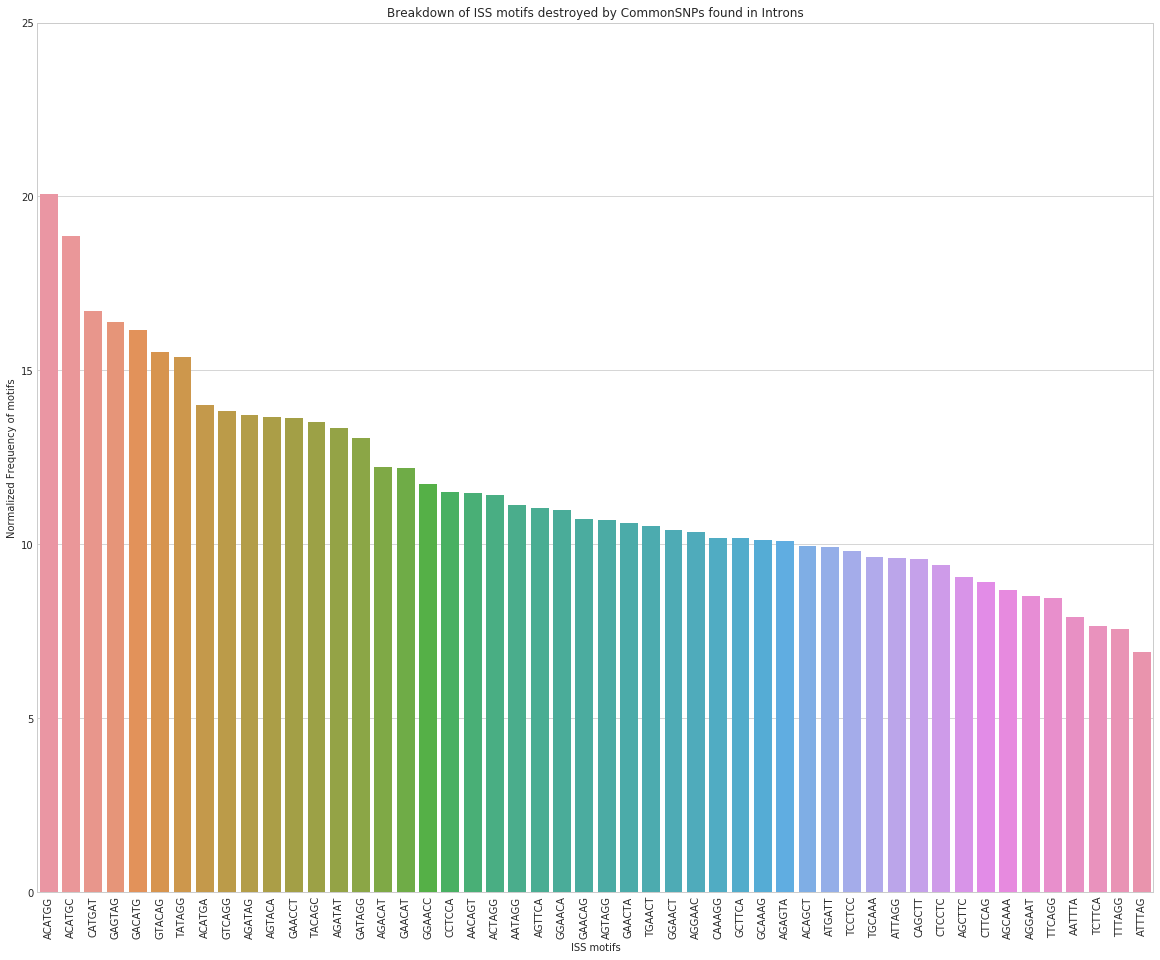

In [40]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_destroyed_Count_df_JustISSs_sorted_ResortByNormalizedCount)
plt.ylim([0,25])
plt.xlabel("ISS motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs destroyed by "+whichDataSet+" found in Introns")
plt.show()

In [41]:
# Take a look at the top 10
ISREs_destroyed_Count_df_JustISSs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
10,ACATGG,6341.0,20.083206
34,ACATGC,4808.0,18.875271
25,CATGAT,5150.0,16.705853
72,GAGTAG,3701.0,16.395486
59,GACATG,4120.0,16.153455
97,GTACAG,3232.0,15.543127
89,TATAGG,3403.0,15.394126
31,ACATGA,4904.0,14.021020
64,GTCAGG,3918.0,13.830059
65,AGATAG,3910.0,13.711010


In [42]:
# Write the ISSs destroyed by Common SNPs into a file
ISREs_destroyed_Count_df_JustISSs_sorted_ResortByNormalizedCount.to_csv("../temp/ISSs_destroyed_commonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)

### Investigate enrichment of ISRE motifs that are flanked by common SNPs

In [67]:
# These are ISREs 100bp flanked by DAVs 
ISREs_flankedByDAVs = pd.read_csv("../temp/"+whichDataSet+"/"+whichDataSet+"_Flanking_100bpISREs.txt",sep="\t",header=None)
ISREs_flankedByDAVs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,929319,929425,GGAACA,+,chr1,929376,929377,rs2340588,+,G,A,0.7887
1,chr1,929276,929382,ATGGGA,+,chr1,929376,929377,rs2340588,+,G,A,0.7887
2,chr1,929311,929417,GGGTTT,+,chr1,929376,929377,rs2340588,+,G,A,0.7887
3,chr1,926642,926748,AGGGAG,+,chr1,926743,926744,rs13303101,+,A,G,0.6827
4,chr1,928049,928155,AGGGAG,+,chr1,928130,928131,rs28626846,+,T,C,0.2728


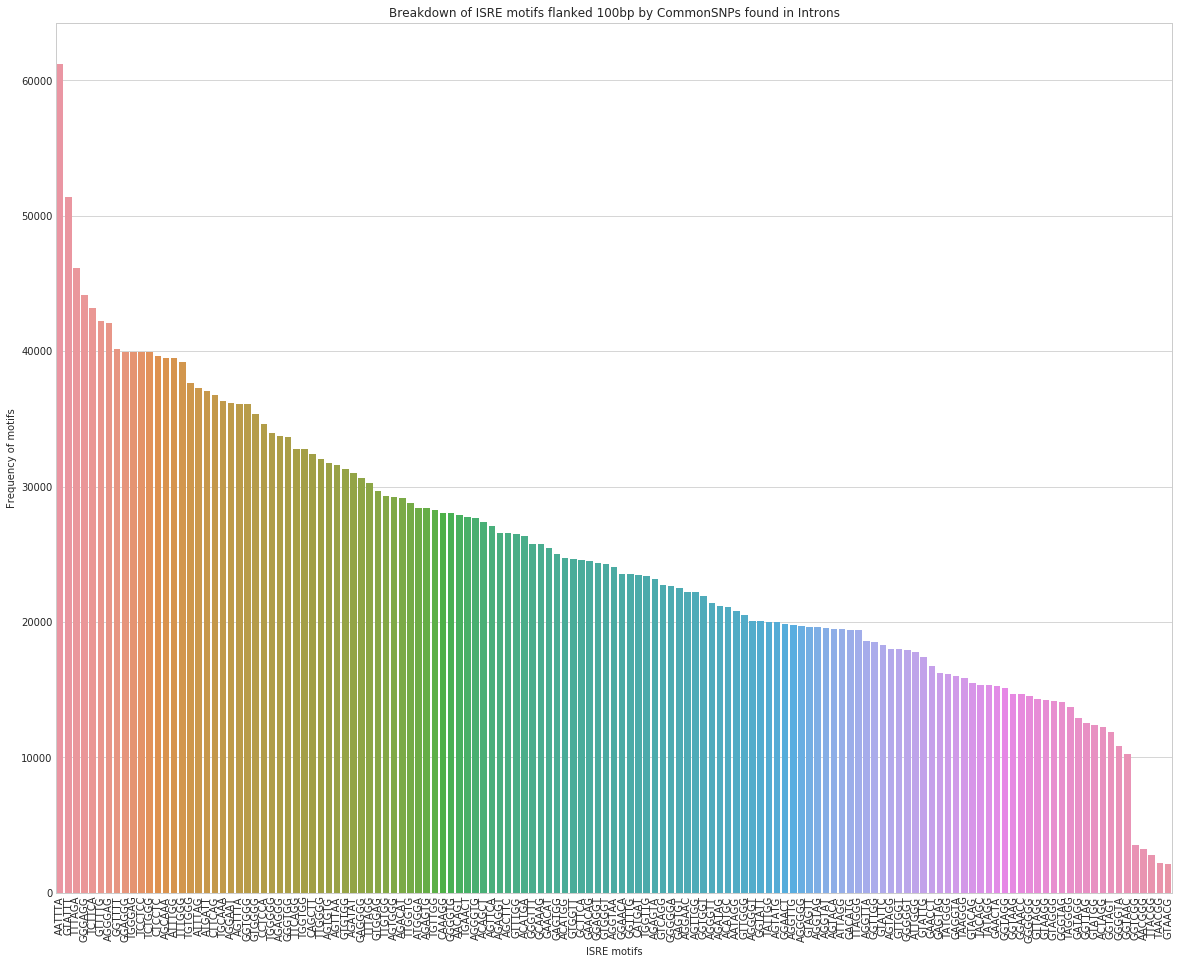

In [68]:
# Look for overrepresented ISREs in those flanked by DAVs
ISREs_flanked_Count = ISREs_flankedByDAVs[3].value_counts()
ISREs_flanked_counts_df = pd.DataFrame({"Numbers":ISREs_flanked_Count.values,"ISREmotifs":ISREs_flanked_Count.index.values},columns=["ISREmotifs","Numbers"])
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_flanked_counts_df)
plt.xlabel("ISRE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs flanked 100bp by "+whichDataSet+" found in Introns")
plt.show()

In [69]:
# Look at the top 10 motifs represented
ISREs_flanked_counts_df.head(n=10)

,ISREmotifs,Numbers
0,AATTTA,61180
1,GTATTT,51365
2,TTTAGA,46147
3,GGGAGG,44158
4,TCTTCA,43196
5,GTTTTG,42222
6,AGGGAG,42079
7,GGTTTT,40173
8,GGAGGG,39978
9,TGGGAG,39965


We need to get normalize the counts to ISRE motif counts found in introns

In [70]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_flanked_counts_df_sorted = ISREs_flanked_counts_df.sort_values(["ISREmotifs"])
print ISREs_flanked_counts_df_sorted.shape
ISREs_flanked_counts_df_sorted.head()

(137, 2)


,ISREmotifs,Numbers
49,AACAGT,27869
133,AACGGG,3212
83,AATAGG,20781
0,AATTTA,61180
52,ACAGCT,27385


In [71]:
# Add a new column that is the normalized counts
ISREs_flanked_counts_df_sorted["Normalized_Count"] = (10**8)*ISREs_flanked_counts_df_sorted["Numbers"]/(sum(ISREs_flanked_counts_df_sorted["Numbers"])*ISREs_inIntron_Count_df_sorted["Numbers"])
print ISREs_flanked_counts_df_sorted.shape
ISREs_flanked_counts_df_sorted.head()

(137, 3)


,ISREmotifs,Numbers,Normalized_Count
49,AACAGT,27869,4.220480
133,AACGGG,3212,4.440567
83,AATAGG,20781,4.075378
0,AATTTA,61180,4.091202
52,ACAGCT,27385,4.177997


In [72]:
# Re-sort by Normalized Count
ISREs_flanked_counts_df_sorted_ResortByNormalizedCount = ISREs_flanked_counts_df_sorted.sort_values(["Normalized_Count"],ascending=False)

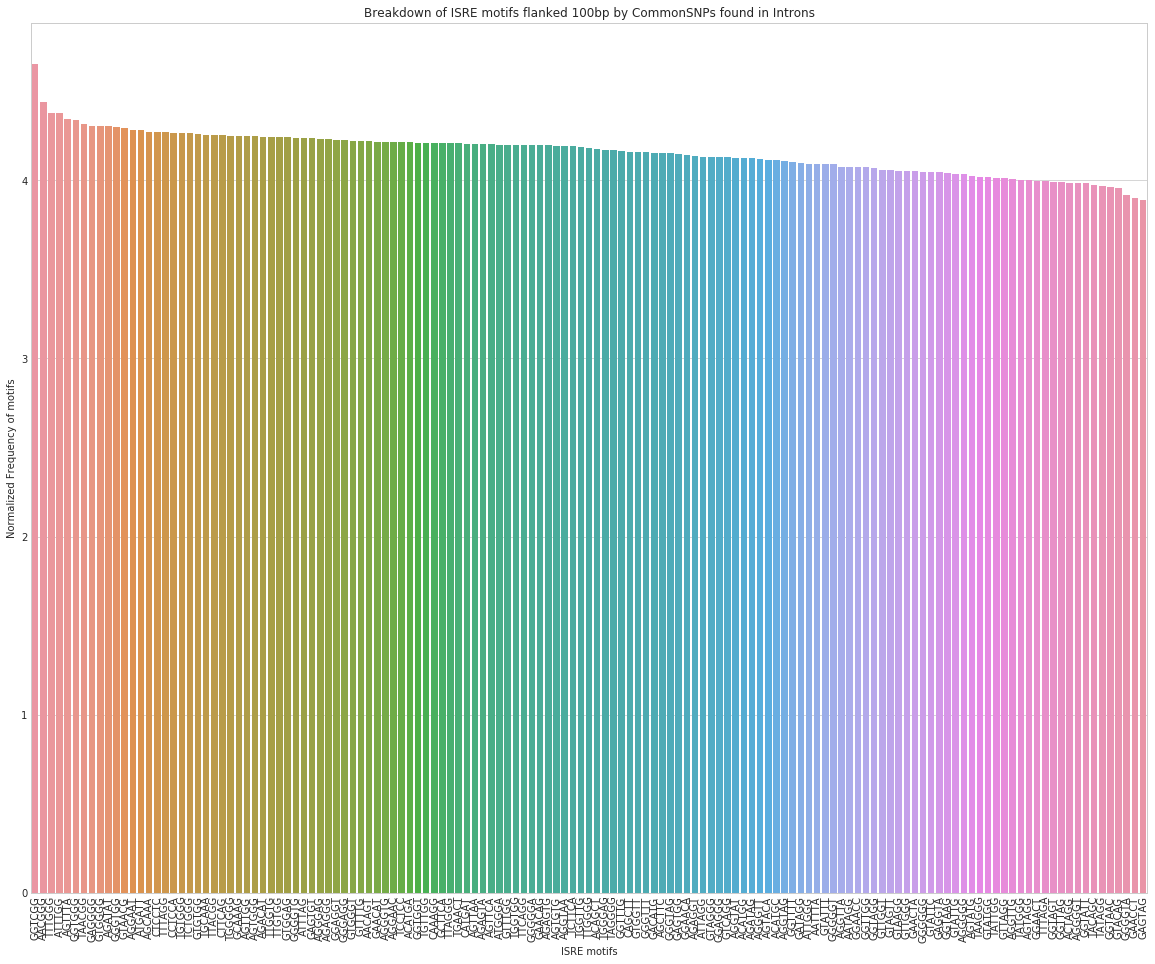

In [73]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_flanked_counts_df_sorted_ResortByNormalizedCount)
plt.xlabel("ISRE motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISRE motifs flanked 100bp by "+whichDataSet+" found in Introns")
plt.show()

In [74]:
# Take a look at the top 10
ISREs_flanked_counts_df_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
132,GGTCGG,3545,4.650701
133,AACGGG,3212,4.440567
15,TTTGGG,39197,4.378039
14,ATTTGG,39468,4.376362
22,AGTTTA,36104,4.342395
23,GGTGGG,36069,4.338275
135,TAACGG,2191,4.315834
37,GAGGGG,30658,4.307882
24,GTGGGG,35342,4.306439
36,AGATAT,31024,4.305310


### Investigate enrichment of ISE motifs that are flanked by common SNPs

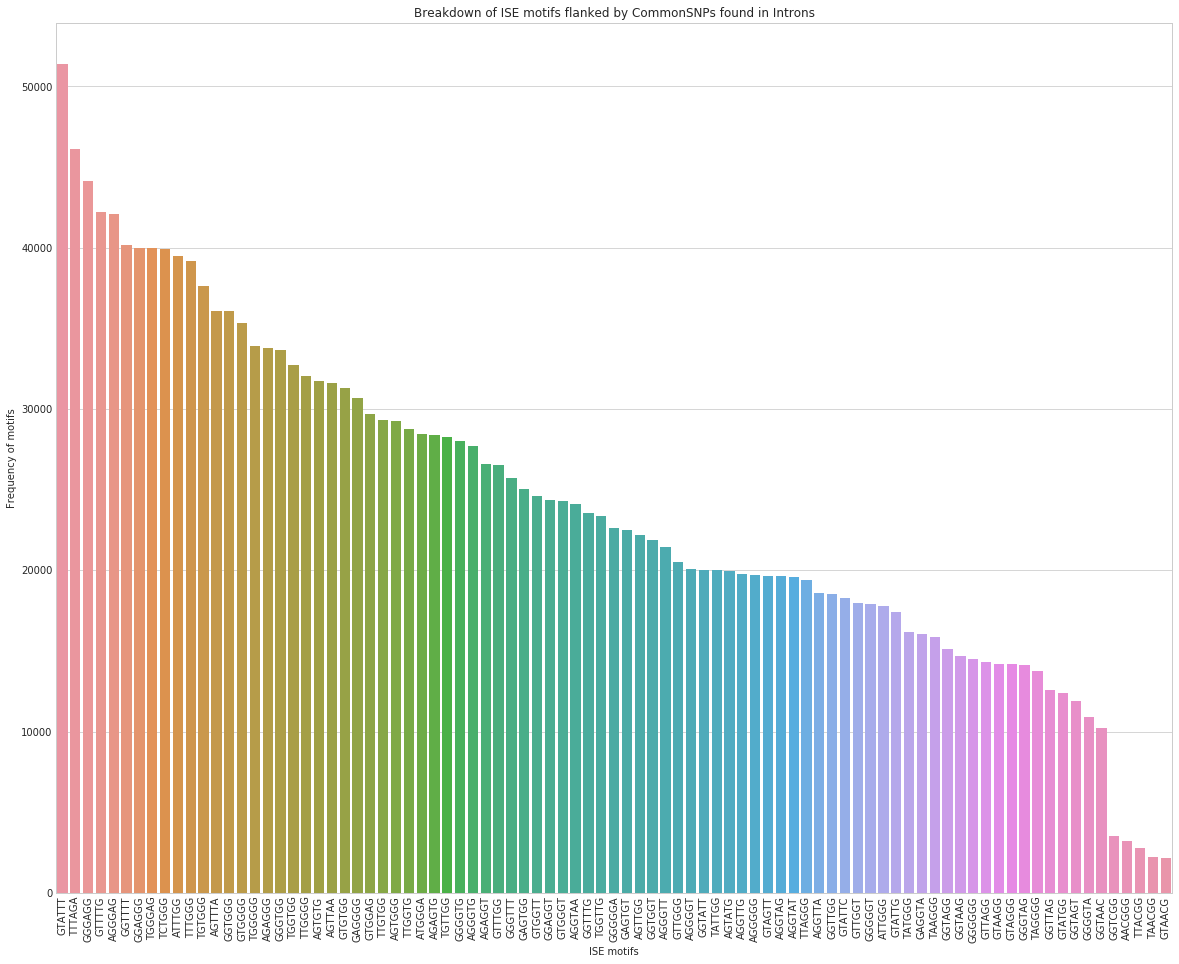

In [75]:
# Look for overrepresented ISREs that are flanked by DAVs
ISREs_flanked_Count_df_JustISEs = ISREs_flanked_counts_df[ISREs_flanked_counts_df["ISREmotifs"].isin(ISE_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_flanked_Count_df_JustISEs)
plt.xlabel("ISE motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs flanked by "+whichDataSet+" found in Introns")
plt.show()

In [76]:
# Look at the top 10 motifs represented
ISREs_flanked_Count_df_JustISEs.head(n=10)

,ISREmotifs,Numbers
1,GTATTT,51365
2,TTTAGA,46147
3,GGGAGG,44158
5,GTTTTG,42222
6,AGGGAG,42079
7,GGTTTT,40173
8,GGAGGG,39978
9,TGGGAG,39965
11,TCTGGG,39910
14,ATTTGG,39468


We need to get normalize the counts to ISE motif counts found in introns

In [77]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_flanked_Count_df_JustISEs_sorted = ISREs_flanked_Count_df_JustISEs.sort_values(["ISREmotifs"])
print ISREs_flanked_Count_df_JustISEs_sorted.shape
ISREs_flanked_Count_df_JustISEs_sorted["Numbers"] = ISREs_flanked_Count_df_JustISEs_sorted["Numbers"].astype(float)
ISREs_flanked_Count_df_JustISEs_sorted.head()

(87, 2)


,ISREmotifs,Numbers
133,AACGGG,3212.0
27,AGAGGG,33761.0
54,AGAGGT,26583.0
45,AGAGTG,28399.0
6,AGGGAG,42079.0


In [79]:
# Add a new column that is the normalized counts
ISREs_flanked_Count_df_JustISEs_sorted["Normalized_Count"] = (10**8)*ISREs_flanked_Count_df_JustISEs_sorted["Numbers"].values/(sum(ISREs_flanked_Count_df_JustISEs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISEs_sorted["Numbers"].values)
print ISREs_flanked_Count_df_JustISEs_sorted.shape
ISREs_flanked_Count_df_JustISEs_sorted.head()

(87, 3)


,ISREmotifs,Numbers,Normalized_Count
133,AACGGG,3212.0,7.239934
27,AGAGGG,33761.0,7.034612
54,AGAGGT,26583.0,6.732234
45,AGAGTG,28399.0,6.939684
6,AGGGAG,42079.0,7.005721


In [80]:
# Re-sort by Normalized Count
ISREs_flanked_Count_df_JustISEs_sorted_ResortByNormalizedCount = ISREs_flanked_Count_df_JustISEs_sorted.sort_values(["Normalized_Count"],ascending=False)

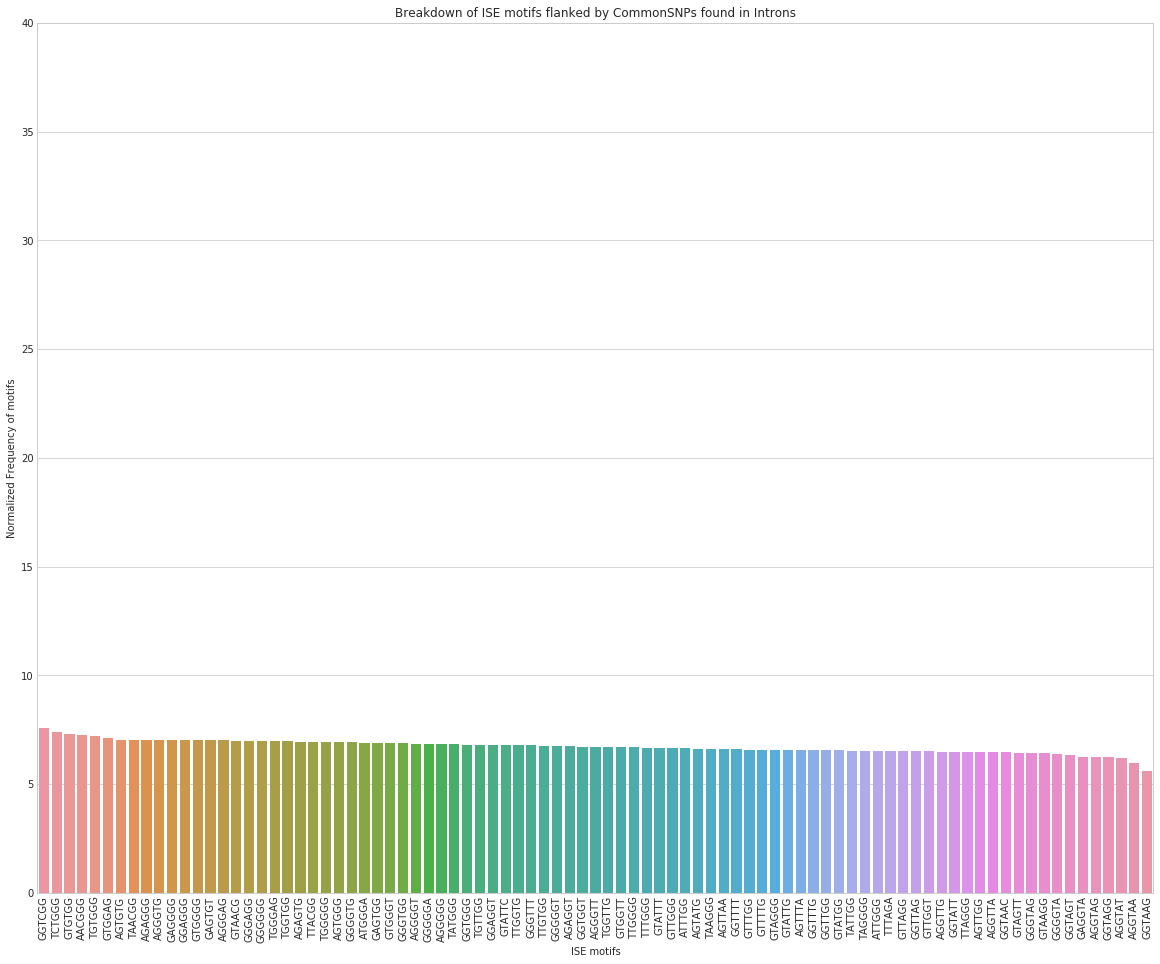

In [83]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_flanked_Count_df_JustISEs_sorted_ResortByNormalizedCount)
plt.ylim([0,40])
plt.xlabel("ISE motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISE motifs flanked by "+whichDataSet+" found in Introns")
plt.show()

In [82]:
# Take a look at the top 10
ISREs_flanked_Count_df_JustISEs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
132,GGTCGG,3545.0,7.582538
11,TCTGGG,39910.0,7.375596
35,GTGTGG,31330.0,7.302700
133,AACGGG,3212.0,7.239934
16,TGTGGG,37642.0,7.188877
39,GTGGAG,29672.0,7.136121
33,AGTGTG,31739.0,7.036809
135,TAACGG,2191.0,7.036568
27,AGAGGG,33761.0,7.034612
51,AGGGTG,27694.0,7.024794


In [84]:
# Write the ISEs flanked by commonSNPs into a file
ISREs_flanked_Count_df_JustISEs_sorted_ResortByNormalizedCount.to_csv("../temp/ISEs_flanked_CommonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)

### Investigate enrichment of ISS motifs that are flanked by common SNPs

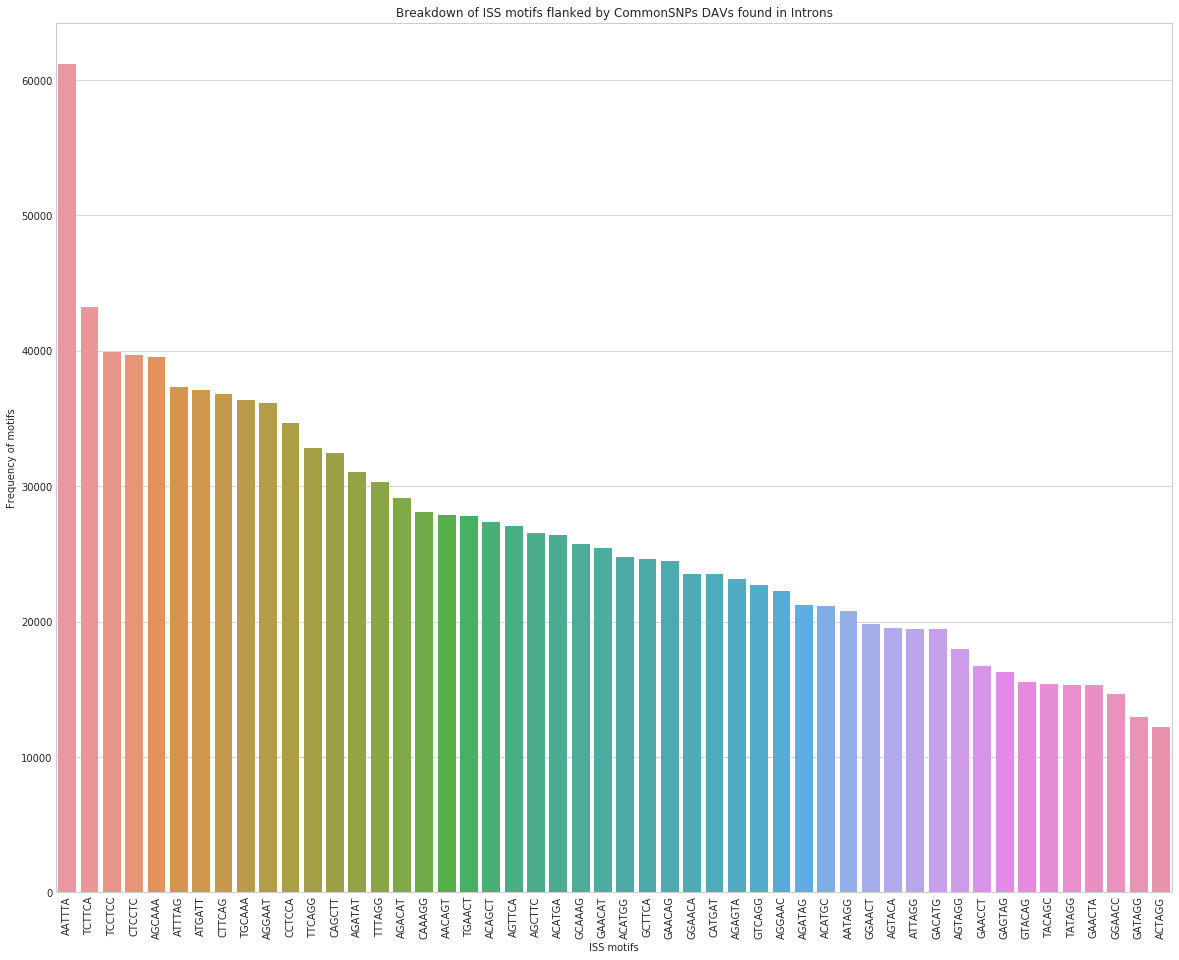

In [85]:
# Look for overrepresented ISREs that are created by DAVs
ISREs_flanked_Count_df_JustISSs = ISREs_flanked_counts_df[ISREs_flanked_counts_df["ISREmotifs"].isin(ISS_motifs[0])]
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Numbers",data=ISREs_flanked_Count_df_JustISSs)
plt.xlabel("ISS motifs")
plt.ylabel("Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs flanked by "+whichDataSet+" DAVs found in Introns")
plt.show()

In [86]:
# Look at the top 10 motifs represented
ISREs_flanked_Count_df_JustISSs.head(n=10)

,ISREmotifs,Numbers
0,AATTTA,61180
4,TCTTCA,43196
10,TCCTCC,39915
12,CTCCTC,39659
13,AGCAAA,39508
17,ATTTAG,37319
18,ATGATT,37070
19,CTTCAG,36772
20,TGCAAA,36335
21,AGGAAT,36167


We need to get normalize the counts to ISS motif counts found in introns

In [87]:
# Let's sort the counts by motif like the counts for ISRE motifs found in Introns
ISREs_flanked_Count_df_JustISSs_sorted = ISREs_flanked_Count_df_JustISSs.sort_values(["ISREmotifs"])
print ISREs_flanked_Count_df_JustISSs_sorted.shape
ISREs_flanked_Count_df_JustISSs_sorted["Numbers"] = ISREs_flanked_Count_df_JustISSs_sorted["Numbers"].astype(float)
ISREs_flanked_Count_df_JustISSs_sorted.head()

(50, 2)


,ISREmotifs,Numbers
49,AACAGT,27869.0
83,AATAGG,20781.0
0,AATTTA,61180.0
52,ACAGCT,27385.0
57,ACATGA,26367.0


In [88]:
# Add a new column that is the normalized counts
ISREs_flanked_Count_df_JustISSs_sorted["Normalized_Count"] = (10**8)*ISREs_flanked_Count_df_JustISSs_sorted["Numbers"].values/(sum(ISREs_flanked_Count_df_JustISSs_sorted["Numbers"].values)*ISREs_inIntron_Count_df_JustISSs_sorted["Numbers"].values)
print ISREs_flanked_Count_df_JustISSs_sorted.shape
ISREs_flanked_Count_df_JustISSs_sorted.head()

(50, 3)


,ISREmotifs,Numbers,Normalized_Count
49,AACAGT,27869.0,10.650923
83,AATAGG,20781.0,10.330593
0,AATTTA,61180.0,10.580974
52,ACAGCT,27385.0,11.207060
57,ACATGA,26367.0,10.903687


In [89]:
# Re-sort by Normalized Count
ISREs_flanked_Count_df_JustISSs_sorted_ResortByNormalizedCount = ISREs_flanked_Count_df_JustISSs_sorted.sort_values(["Normalized_Count"],ascending=False)

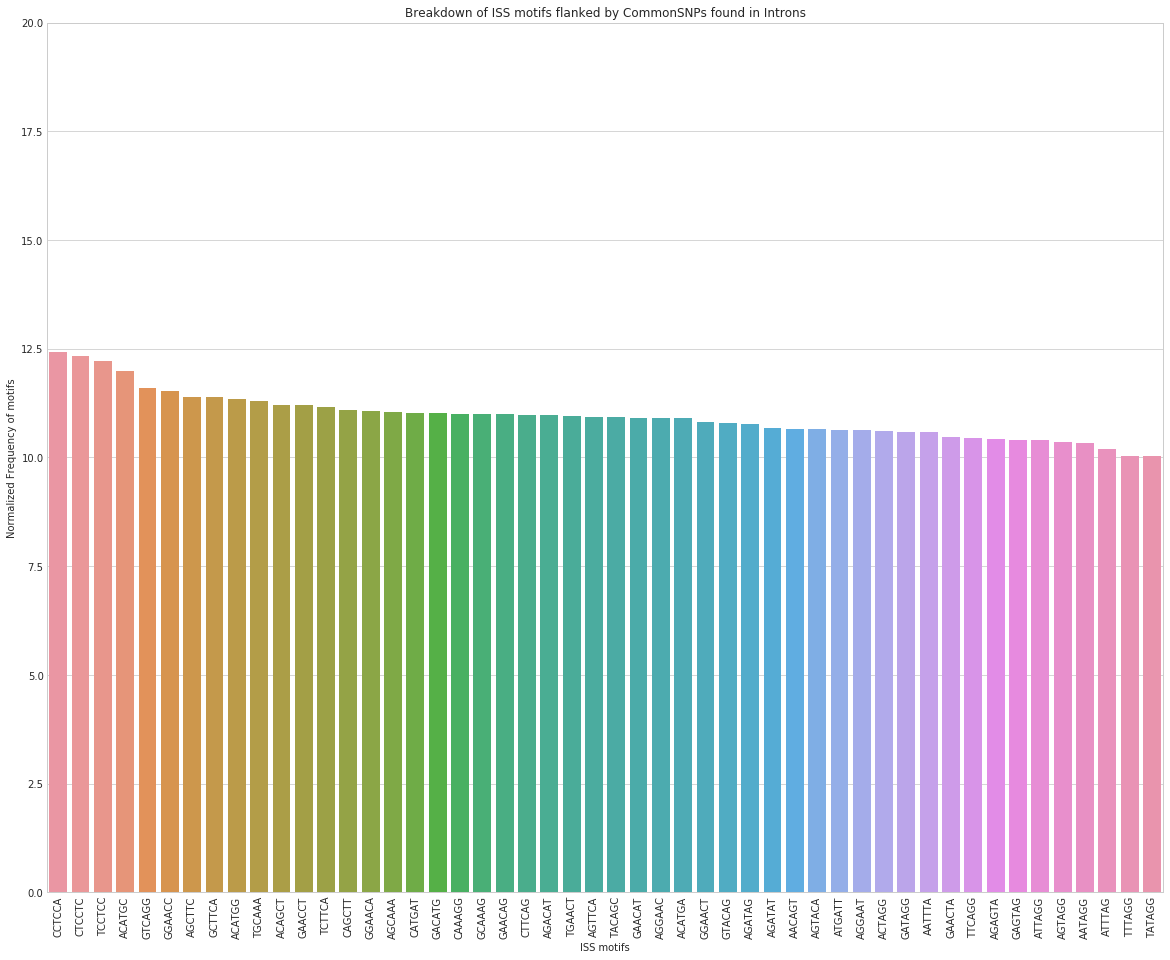

In [92]:
# Plot the frequency distribution now
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
ax = sns.barplot(x="ISREmotifs",y="Normalized_Count",data=ISREs_flanked_Count_df_JustISSs_sorted_ResortByNormalizedCount)
plt.ylim([0,20])
plt.xlabel("ISS motifs")
plt.ylabel("Normalized Frequency of motifs")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Breakdown of ISS motifs flanked by "+whichDataSet+" found in Introns")
plt.show()

In [91]:
# Take a look at the top 10
ISREs_flanked_Count_df_JustISSs_sorted_ResortByNormalizedCount.head(n=10)

,ISREmotifs,Numbers,Normalized_Count
25,CCTCCA,34630.0,12.428934
12,CTCCTC,39659.0,12.336459
10,TCCTCC,39915.0,12.227429
82,ACATGC,21124.0,11.994673
74,GTCAGG,22731.0,11.605441
118,GGAACC,14671.0,11.520888
55,AGCTTC,26569.0,11.396161
64,GCTTCA,24592.0,11.393937
62,ACATGG,24757.0,11.341143
20,TGCAAA,36335.0,11.302717


In [93]:
# Write the ISSs flanked by commonSNPs into a file
ISREs_flanked_Count_df_JustISSs_sorted_ResortByNormalizedCount.to_csv("../temp/ISSs_flanked_CommonSNPs_NormalizedCounts.txt",sep="\t",header=False,index=False)